1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.

In [2]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

### 1. Познакомьтесь с данными.

In [4]:
data = pd.read_csv('air_data.csv', sep = ';')

In [5]:
data

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11 00:00:00,2022-06-22 00:00:00,CHD,480,MOW,OMS,ВВЛ,NaN,ONLINE
49996,2022-06-06 00:00:00,2022-06-20 00:00:00,AD,270,LED,MOW,ВВЛ,NaN,OFFLINE
49997,2022-06-26 00:00:00,2022-06-29 00:00:00,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26 00:00:00,2022-06-28 00:00:00,AD,270,KZN,MOW,ВВЛ,NaN,OFFLINE


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ISSUE_DATE         50000 non-null  object
 1   FLIGHT_DATE_LOC    50000 non-null  object
 2   PAX_TYPE           50000 non-null  object
 3   REVENUE_AMOUNT     50000 non-null  int64 
 4   ORIG_CITY_CODE     49998 non-null  object
 5   DEST_CITY_CODE     49999 non-null  object
 6   ROUTE_FLIGHT_TYPE  50000 non-null  object
 7   FFP_FLAG           19398 non-null  object
 8   SALE_TYPE          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


Вывод:

При загрузке датасета было правильно отформатировано разделение столбцов, в следствие чего датасет состоит из 50 строк и 9 столбцов. В последующих пунктах стоит проверить пропуски и выполнить остальные необходимые действия. По вервичным данным среди них будет изменение заголовков с прописных букв, изменения типа данных для дат, заполнения пропусков для программы лояльности и т.д..

### 2. Осуществите предобработку данных.

#### 2.1 Приведите заголовки к удобному виду.

In [11]:
data.columns

Index(['ISSUE_DATE', 'FLIGHT_DATE_LOC', 'PAX_TYPE', 'REVENUE_AMOUNT',
       'ORIG_CITY_CODE', 'DEST_CITY_CODE', 'ROUTE_FLIGHT_TYPE', 'FFP_FLAG',
       'SALE_TYPE'],
      dtype='object')

In [12]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [13]:
data.columns

Index(['issue_date', 'flight_date_loc', 'pax_type', 'revenue_amount',
       'orig_city_code', 'dest_city_code', 'route_flight_type', 'ffp_flag',
       'sale_type'],
      dtype='object')

Вывод:

Заголовки как приведены к строчному виду, так и заменены вероятные пробелы на нижнее подчёркивание.

#### 2.2 Проверьте типы данных.

In [17]:
data.dtypes

issue_date           object
flight_date_loc      object
pax_type             object
revenue_amount        int64
orig_city_code       object
dest_city_code       object
route_flight_type    object
ffp_flag             object
sale_type            object
dtype: object

In [18]:
data['issue_date'] = pd.to_datetime(data['issue_date'], errors='coerce')
data['flight_date_loc'] = pd.to_datetime(data['flight_date_loc'], errors='coerce')

In [19]:
data.dtypes

issue_date           datetime64[ns]
flight_date_loc      datetime64[ns]
pax_type                     object
revenue_amount                int64
orig_city_code               object
dest_city_code               object
route_flight_type            object
ffp_flag                     object
sale_type                    object
dtype: object

Вывод:

Среди типов данных были изменены типы у столбоц с датами: датой покупки и датой совершения перелёта. Изменены они на тип данных для дат - datetime64.

#### 2.3 Обработайте пропуски.

In [23]:
data.isna().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           2
dest_city_code           1
route_flight_type        0
ffp_flag             30602
sale_type                0
dtype: int64

<div style="background-color:#abebc6 ; padding:10px; border-radius:5px;">
    Изменил тип данных в столбце на булевый. Теперь если есть программа лояльности, то True, если нет, то False. В дальнейшем, вроде, тоже все подправил.
</div>

In [25]:
data['ffp_flag'] = data['ffp_flag'].notna()

In [26]:
data['ffp_flag'].unique()

array([False,  True])

In [27]:
data.isna().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       2
dest_city_code       1
route_flight_type    0
ffp_flag             0
sale_type            0
dtype: int64

In [28]:
data['dest_city_code'].unique()

array(['KGD', 'OVB', 'MOW', 'KRR', 'DUS', 'PEE', 'AER', 'NJC', 'KUF',
       'UUD', 'HEL', 'LED', 'ABA', 'EVN', 'GDZ', 'KZN', 'MRV', 'SIP',
       'SKG', 'FEG', 'MQF', 'VOG', 'HKT', 'CEK', 'RTW', 'IKT', 'ULY',
       'NUX', 'TOF', 'DXB', 'YKS', 'KHV', 'UUS', 'BQS', 'SVX', 'PKC',
       'SGC', 'IJK', 'OGZ', 'AAQ', 'MMK', 'UFA', 'KJA', 'KIV', 'NOZ',
       'BAK', 'CGN', 'ROV', 'NER', 'EGO', 'KEJ', 'TLK', 'VIE', 'BAX',
       'PEZ', 'HTA', 'STW', 'GDX', 'VVO', 'AYT', 'RGK', 'VRN', 'TAS',
       'BLQ', 'TOX', 'BTK', 'NSK', 'OSS', 'GOJ', 'ASF', 'SSH', 'DYU',
       'OMS', 'VOZ', 'SEL', 'FRU', 'LBD', 'MCX', 'HAJ', 'MJZ', 'PFO',
       'HRG', 'BOJ', 'GRV', 'DYR', 'IWA', 'NOJ', 'NYM', 'NVI', 'KQT',
       'RKT', 'UGC', 'TJM', 'HMA', 'BER', 'PWQ', 'BKK', 'LPK', 'INN',
       'NMA', 'KSQ', 'LWN', 'MSQ', 'KVK', 'REN', 'IKU', 'TJU', 'BHK',
       'AUH', 'VAR', 'NQZ', 'ATH', 'ROM', 'LCA', 'TLV', 'UKK', 'BZK',
       'PYJ', 'PUY', 'ALC', 'DOH', 'RIX', 'KXK', 'SLY', 'PAR', 'NBC',
       'SKD', 'MUC',

In [29]:
data['orig_city_code'].unique()

array(['MOW', 'UUS', 'KGD', 'VOZ', 'OVB', 'KZN', 'PEZ', 'UUD', 'GDZ',
       'TAS', 'SVX', 'OMS', 'LED', 'OGZ', 'AER', 'UFA', 'EGO', 'KRR',
       'KEJ', 'KUF', 'LBD', 'NUX', 'IKT', 'BOJ', 'DXB', 'KJA', 'AAQ',
       'TOF', 'LPK', 'SGC', 'AYT', 'HRG', 'VAR', 'MJZ', 'SIP', 'ROV',
       'BKK', 'MMK', 'KIV', 'PAR', 'BTK', 'KVK', 'PEE', 'RTW', 'NER',
       'NOZ', 'MCX', 'GOJ', 'NJC', 'MQF', 'SSH', 'YKS', 'BQS', 'IWA',
       'VVO', 'PKC', 'ABA', 'NOJ', 'CEK', 'HKT', 'BAK', 'VOG', 'ULY',
       'TLK', 'NSK', 'KSQ', 'KQT', 'MUC', 'FEG', 'ROM', 'ALA', 'MRV',
       'HTA', 'UGC', 'STW', 'GDX', 'OSS', 'ASF', 'KHV', 'MSQ', 'RGK',
       'TJM', 'DYR', 'IAR', 'BAX', 'ALC', 'DYU', 'SEL', 'CRZ', 'EVN',
       'HER', 'NCE', 'LCA', 'LWN', 'UKK', 'BHK', 'NYM', 'IKU', 'NMA',
       'BER', 'FRU', 'GRV', nan, 'REN', 'SKD', 'BZK', 'NVI', 'BCN', 'SLY',
       'HAJ', 'PFO', 'PUY', 'NQZ', 'NBC', 'TLV', 'HMA', 'PYJ', 'IJK',
       'KXK', 'TJU', 'DOH', 'JED', 'OHH', 'RKT', 'BAH', 'SKG', 'DUS',
       'IST', '

Вывод:

Пропуски присутствуют в 3-ёх столбцах. Наибольшее количество пропусков находится в ffp_flag, которое отвечает за наличие/отсутствие программы лояольности. Пропуски заменены на значение 'NO', то есть отсутствие программы лояльности. На латинице ради соостветствия другому значению столбца 'FFP'. Пропуски в orig_city_code и dest_city_code пока были оставлены для дальнейших действия, ибо пока недостаточно данных для логического восстановления пропусков.

#### 2.4 Проверьте наличие дубликатов.

In [33]:
data.duplicated().sum()

169

In [34]:
data = data.drop_duplicates()

In [35]:
data

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,False,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,True,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,False,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,False,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,True,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,False,OFFLINE


Явные дубликаты удалены

In [37]:
data.columns

Index(['issue_date', 'flight_date_loc', 'pax_type', 'revenue_amount',
       'orig_city_code', 'dest_city_code', 'route_flight_type', 'ffp_flag',
       'sale_type'],
      dtype='object')

In [38]:
data['pax_type'].unique()

array(['AD', 'CHD', 'INF'], dtype=object)

In [39]:
data['route_flight_type'].unique()

array(['ВВЛ', 'МВЛ'], dtype=object)

In [40]:
data['ffp_flag'].unique()

array([False,  True])

In [41]:
data['sale_type'].unique()

array(['ONLINE', 'OFFLINE'], dtype=object)

In [42]:
data['issue_date'].unique()

<DatetimeArray>
['2021-12-07 00:00:00', '2021-12-31 00:00:00', '2021-11-28 00:00:00',
 '2021-12-08 00:00:00', '2021-11-29 00:00:00', '2021-12-03 00:00:00',
 '2021-12-02 00:00:00', '2021-11-25 00:00:00', '2021-12-06 00:00:00',
 '2021-12-05 00:00:00',
 ...
 '2022-09-24 00:00:00', '2022-09-18 00:00:00', '2022-04-10 00:00:00',
 '2022-01-27 00:00:00', '2022-07-16 00:00:00', '2022-07-23 00:00:00',
 '2022-04-23 00:00:00', '2022-09-11 00:00:00', '2022-06-28 00:00:00',
 '2022-07-05 00:00:00']
Length: 365, dtype: datetime64[ns]

In [43]:
data['flight_date_loc'].unique()

<DatetimeArray>
['2022-01-11 00:00:00', '2022-01-03 00:00:00', '2022-01-04 00:00:00',
 '2022-01-05 00:00:00', '2022-01-12 00:00:00', '2022-01-14 00:00:00',
 '2022-01-06 00:00:00', '2022-01-07 00:00:00', '2022-01-10 00:00:00',
 '2022-01-24 00:00:00',
 ...
 '2021-12-02 00:00:00', '2022-05-18 00:00:00', '2022-05-07 00:00:00',
 '2022-05-13 00:00:00', '2022-05-08 00:00:00', '2022-05-20 00:00:00',
 '2022-05-09 00:00:00', '2022-05-21 00:00:00', '2022-05-02 00:00:00',
 '2022-05-01 00:00:00']
Length: 370, dtype: datetime64[ns]

In [44]:
data['dest_city_code'].unique()

array(['KGD', 'OVB', 'MOW', 'KRR', 'DUS', 'PEE', 'AER', 'NJC', 'KUF',
       'UUD', 'HEL', 'LED', 'ABA', 'EVN', 'GDZ', 'KZN', 'MRV', 'SIP',
       'SKG', 'FEG', 'MQF', 'VOG', 'HKT', 'CEK', 'RTW', 'IKT', 'ULY',
       'NUX', 'TOF', 'DXB', 'YKS', 'KHV', 'UUS', 'BQS', 'SVX', 'PKC',
       'SGC', 'IJK', 'OGZ', 'AAQ', 'MMK', 'UFA', 'KJA', 'KIV', 'NOZ',
       'BAK', 'CGN', 'ROV', 'NER', 'EGO', 'KEJ', 'TLK', 'VIE', 'BAX',
       'PEZ', 'HTA', 'STW', 'GDX', 'VVO', 'AYT', 'RGK', 'VRN', 'TAS',
       'BLQ', 'TOX', 'BTK', 'NSK', 'OSS', 'GOJ', 'ASF', 'SSH', 'DYU',
       'OMS', 'VOZ', 'SEL', 'FRU', 'LBD', 'MCX', 'HAJ', 'MJZ', 'PFO',
       'HRG', 'BOJ', 'GRV', 'DYR', 'IWA', 'NOJ', 'NYM', 'NVI', 'KQT',
       'RKT', 'UGC', 'TJM', 'HMA', 'BER', 'PWQ', 'BKK', 'LPK', 'INN',
       'NMA', 'KSQ', 'LWN', 'MSQ', 'KVK', 'REN', 'IKU', 'TJU', 'BHK',
       'AUH', 'VAR', 'NQZ', 'ATH', 'ROM', 'LCA', 'TLV', 'UKK', 'BZK',
       'PYJ', 'PUY', 'ALC', 'DOH', 'RIX', 'KXK', 'SLY', 'PAR', 'NBC',
       'SKD', 'MUC',

In [45]:
data['orig_city_code'].unique()

array(['MOW', 'UUS', 'KGD', 'VOZ', 'OVB', 'KZN', 'PEZ', 'UUD', 'GDZ',
       'TAS', 'SVX', 'OMS', 'LED', 'OGZ', 'AER', 'UFA', 'EGO', 'KRR',
       'KEJ', 'KUF', 'LBD', 'NUX', 'IKT', 'BOJ', 'DXB', 'KJA', 'AAQ',
       'TOF', 'LPK', 'SGC', 'AYT', 'HRG', 'VAR', 'MJZ', 'SIP', 'ROV',
       'BKK', 'MMK', 'KIV', 'PAR', 'BTK', 'KVK', 'PEE', 'RTW', 'NER',
       'NOZ', 'MCX', 'GOJ', 'NJC', 'MQF', 'SSH', 'YKS', 'BQS', 'IWA',
       'VVO', 'PKC', 'ABA', 'NOJ', 'CEK', 'HKT', 'BAK', 'VOG', 'ULY',
       'TLK', 'NSK', 'KSQ', 'KQT', 'MUC', 'FEG', 'ROM', 'ALA', 'MRV',
       'HTA', 'UGC', 'STW', 'GDX', 'OSS', 'ASF', 'KHV', 'MSQ', 'RGK',
       'TJM', 'DYR', 'IAR', 'BAX', 'ALC', 'DYU', 'SEL', 'CRZ', 'EVN',
       'HER', 'NCE', 'LCA', 'LWN', 'UKK', 'BHK', 'NYM', 'IKU', 'NMA',
       'BER', 'FRU', 'GRV', nan, 'REN', 'SKD', 'BZK', 'NVI', 'BCN', 'SLY',
       'HAJ', 'PFO', 'PUY', 'NQZ', 'NBC', 'TLV', 'HMA', 'PYJ', 'IJK',
       'KXK', 'TJU', 'DOH', 'JED', 'OHH', 'RKT', 'BAH', 'SKG', 'DUS',
       'IST', '

In [46]:
url_1 = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'

column_names = [
    'Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 
    'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source'
]

codes = pd.read_csv(url_1, header = None, names = column_names)

In [47]:
codes

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [48]:
data.head(3)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE


In [49]:
codes.head(3)

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports


In [50]:
unique_orig_city_code = set(data['orig_city_code'])

In [51]:
unique_dest_city_code = set(data['dest_city_code'])

In [52]:
unique_codes = set(codes['IATA'])

In [53]:
are_equal = unique_dest_city_code == unique_orig_city_code
are_equal

False

In [54]:
only_in_unique_orig_city_code = unique_orig_city_code.difference(unique_dest_city_code)
only_in_unique_dest_city_code = unique_dest_city_code.difference(unique_orig_city_code)
print('Только в отправлениях', only_in_unique_orig_city_code)
print('Только в прибытиях', only_in_unique_dest_city_code)

Только в отправлениях {'CMB', 'SPU', 'FRA', 'CMN', 'ZRH', 'CRZ', 'OHH', 'NAL', 'JED', 'BAH', 'DLM'}
Только в прибытиях {'KBV', 'AGP', 'RIX', 'INN', 'MCT', 'HEL', 'AUH', 'MLE', 'PWQ', 'BJS', 'NGK'}


In [55]:
# Пересекаем значения, чтобы найти одинаковые
common_values = unique_orig_city_code.intersection(unique_codes)

# Выводим результат
print('Сравнение для городов отправления')
print('Длина списка:', len(common_values))
print('Есть и в data, и в codes по столбцам с кодами городов:', common_values)

Сравнение для городов отправления
Длина списка: 133
Есть и в data, и в codes по столбцам с кодами городов: {'OVB', 'ASF', 'NJC', 'NYM', 'SGC', 'ABA', 'MCX', 'IJK', 'KVK', 'BAH', 'MJZ', 'VRN', 'SPU', 'GDZ', 'HTA', 'NVI', 'DYR', 'DLM', 'BOJ', 'NMA', 'VAR', 'EGO', 'DXB', 'KEJ', 'AAQ', 'HER', 'OSS', 'DUS', 'NUX', 'IKT', 'KHV', 'USM', 'LWN', 'MUC', 'JED', 'NCE', 'SKG', 'RHO', 'SKD', 'KUF', 'KZN', 'BQS', 'OMS', 'REN', 'MMK', 'BZK', 'MRV', 'FRU', 'SSH', 'HMA', 'ZRH', 'LBD', 'IST', 'HRG', 'ROV', 'YKS', 'FEG', 'KJA', 'BKK', 'IAR', 'IWA', 'NER', 'KQT', 'TAS', 'PKC', 'TLK', 'PEE', 'SIP', 'CEK', 'STW', 'MSQ', 'HKT', 'PYJ', 'VIE', 'NAL', 'SKX', 'BTK', 'ALC', 'DYU', 'NOZ', 'MQF', 'UKK', 'KSQ', 'GDX', 'UGC', 'NOJ', 'KRR', 'SVX', 'HAJ', 'LCA', 'BLQ', 'SLY', 'GOJ', 'AER', 'FRA', 'PUY', 'CGN', 'KGD', 'CMN', 'LED', 'UFA', 'VOG', 'DOH', 'PFO', 'ULY', 'RGK', 'ATH', 'KXK', 'IKU', 'EVN', 'NBC', 'NSK', 'TJU', 'AYT', 'TJM', 'BAX', 'LPK', 'RTW', 'CRZ', 'RKT', 'UUD', 'VVO', 'OGZ', 'TLV', 'CMB', 'BCN', 'KIV', 'AL

In [56]:
# Пересекаем значения, чтобы найти одинаковые
common_values = unique_dest_city_code.intersection(unique_codes)

# Выводим результат
print('Сравнение для городов прибытия')
print('Длина списка:', len(common_values))
print('Есть и в data, и в codes по столбцам с кодами городов:', common_values)

Сравнение для городов прибытия
Длина списка: 133
Есть и в data, и в codes по столбцам с кодами городов: {'OVB', 'ASF', 'AGP', 'NJC', 'NYM', 'VOZ', 'ABA', 'IJK', 'MCX', 'KVK', 'MJZ', 'VRN', 'GDZ', 'HTA', 'NVI', 'DYR', 'BOJ', 'NMA', 'KBV', 'VAR', 'EGO', 'AUH', 'DXB', 'KEJ', 'AAQ', 'HER', 'OSS', 'DUS', 'IKT', 'NUX', 'KHV', 'USM', 'LWN', 'NGK', 'MUC', 'NCE', 'SKG', 'RHO', 'SKD', 'INN', 'KUF', 'KZN', 'BQS', 'OMS', 'REN', 'MMK', 'BZK', 'MCT', 'MRV', 'FRU', 'SSH', 'HMA', 'HEL', 'LBD', 'IST', 'HRG', 'ROV', 'YKS', 'FEG', 'KJA', 'BKK', 'IAR', 'IWA', 'NER', 'KQT', 'TAS', 'PKC', 'TLK', 'PEE', 'SIP', 'CEK', 'STW', 'MSQ', 'HKT', 'PYJ', 'VIE', 'SKX', 'BTK', 'UKK', 'DYU', 'NOZ', 'MQF', 'ALC', 'KSQ', 'GDX', 'UGC', 'NOJ', 'RIX', 'KRR', 'SVX', 'HAJ', 'LCA', 'BLQ', 'SLY', 'GOJ', 'AER', 'PUY', 'CGN', 'KGD', 'LED', 'VOG', 'UFA', 'DOH', 'PFO', 'ULY', 'MLE', 'RGK', 'ATH', 'KXK', 'IKU', 'EVN', 'NBC', 'NSK', 'TJU', 'BAX', 'AYT', 'TJM', 'RTW', 'LPK', 'RKT', 'UUD', 'VVO', 'OGZ', 'TLV', 'BCN', 'KIV', 'ALA', 'TOF',

In [57]:
only_in_uocc = unique_orig_city_code.difference(unique_codes)

print('Непопадающие в data по столбцу отправления:', only_in_uocc)

Непопадающие в data по столбцу отправления: {nan, 'TYO', 'GRV', 'MOW', 'BAK', 'LON', 'TOX', 'NQZ', 'PAR', 'OHH', 'SEL', 'ROM', 'MIL', 'BER'}


In [58]:
only_in_udcc = unique_dest_city_code.difference(unique_codes)

print('Непопадающие в data по столбцу назначения:', only_in_udcc)

Непопадающие в data по столбцу назначения: {nan, 'TYO', 'GRV', 'MOW', 'BAK', 'LON', 'TOX', 'BJS', 'PAR', 'NQZ', 'SEL', 'ROM', 'MIL', 'BER'}


In [59]:
rows_with_missing_values = data[data.isnull().any(axis=1)]

rows_with_missing_values

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
2020,2022-02-17,2022-03-22,AD,440,NaN,KHV,МВЛ,False,ONLINE
8100,2022-05-02,2022-05-11,AD,440,NaN,KHV,МВЛ,False,OFFLINE
47582,2022-05-13,2022-07-28,AD,440,KHV,NaN,МВЛ,False,OFFLINE


In [60]:
codes[codes['IATA'] == 'KHV']

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
2776,2927,Khabarovsk-Novy Airport,Khabarovsk,Russia,KHV,UHHH,48.528,135.188004,244,10,N,Asia/Vladivostok,airport,OurAirports


Вывод:

Сразу же были найдены и удалены явные дубликаты. Что же касается неявных дубликатов, то их найдено не было. В добавок, в этом пункте было проведено изучение данных для датасета, в котором находится информация о аэропортах с github'а. В них найдено отсутствие несоответствие 14 значений в data и codes. В последствии эти значения для задания с городами будут записаны в ручную (только эти 14 значений), ибо для некоторых существуют города, но в них несколько аэропортов с другими абюревиатурами, которые наугад было бы выставлять нелогично.

#### 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 

In [64]:
df = data[data['revenue_amount'] > 0].dropna(subset=['revenue_amount'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49365 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         49365 non-null  datetime64[ns]
 1   flight_date_loc    49365 non-null  datetime64[ns]
 2   pax_type           49365 non-null  object        
 3   revenue_amount     49365 non-null  int64         
 4   orig_city_code     49363 non-null  object        
 5   dest_city_code     49364 non-null  object        
 6   route_flight_type  49365 non-null  object        
 7   ffp_flag           49365 non-null  bool          
 8   sale_type          49365 non-null  object        
dtypes: bool(1), datetime64[ns](2), int64(1), object(5)
memory usage: 3.4+ MB


Дополнительно просмотрим строки с пропущенными значениями в столбцах 'orig_city_code' и 'dest_city_code'.

In [67]:
df['revenue_amount'].unique()

array([ 200,  610,  390,  190,  250,   70,  490,  280,  360,  380,  210,
        370, 1090,  470,  450,  300,  180,  570,  430,  350,  130,  230,
        290,  160,  420,  690,  340,  310,  520,  440,  400,  930,  240,
        170,  270,  150,  560,  260,  220,  680, 1820,  410,  630,  550,
        840,  110,  140,  100,  640,  720,  460,  120,  540,  330, 1030,
         40,  320,  530,  820,   50,  480,  960,  500,  760, 2000,  810,
        670,  790,  950,  590,  600,  510,  710,  830, 1140,  620,  750,
        770, 1200, 1110,  970, 1180,  740,  650,  730,  660,  800,  860,
        890,  920,  580,  700,  880,  850,  940, 1070,  910, 1690,  870,
       1930,  780, 2990, 1780,  980, 1620,   60,   90, 1150, 1160, 1040,
        900, 1760, 1320,   80, 1020, 2270,  990, 1260, 1080, 1940, 1060,
       1280, 1190, 1470, 1810, 1520, 1010, 1000, 1360, 1340, 1220, 1980,
       1530, 1330, 2300, 1450, 1630, 1510, 2060, 1590, 1120, 1500, 1860,
       1250, 1050, 1660, 1460, 1610, 2050, 1100, 15

In [68]:
missing_city_df = df[df['orig_city_code'].isnull() | df['dest_city_code'].isnull()]

In [69]:
missing_city_df

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
2020,2022-02-17,2022-03-22,AD,440,NaN,KHV,МВЛ,False,ONLINE
8100,2022-05-02,2022-05-11,AD,440,NaN,KHV,МВЛ,False,OFFLINE
47582,2022-05-13,2022-07-28,AD,440,KHV,NaN,МВЛ,False,OFFLINE


Даже после исключения нулевых значений пропуски остались. Каких-либо путей логического заполнения нет, а сами эти 3 строки составляют лишь очень малую часть всех строк, но пока я их оставлю.

Вывод:

Были исключены нулевые значения из датасета по столбцу выручки и создан новый датасет - df. Как и писалось ранее, пропуски по столбцам с кодами отправления и прибытия решено было оставить.

 Общий вывод:

С данными было проведено ознакомление, а также выполнены необходимые действия, в том числе удалено 169 явных дубликата, заменены пропуски по столбцу программы лояльности и выолнены дополнительные проверки для принятия последующий решений.

### 3. Исследовательский анализ данных:

#### 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.

##### Динамика выручки по датам покупки билета

In [78]:
df_grouped_by_revenue = df.groupby('issue_date')['revenue_amount'].sum()

In [79]:
df_grouped_by_revenue

issue_date
2021-10-01    60310
2021-10-02    33100
2021-10-03    34320
2021-10-04    58190
2021-10-05    60800
              ...  
2022-09-26    39520
2022-09-27    48350
2022-09-28    44860
2022-09-29    27460
2022-09-30    25980
Name: revenue_amount, Length: 365, dtype: int64

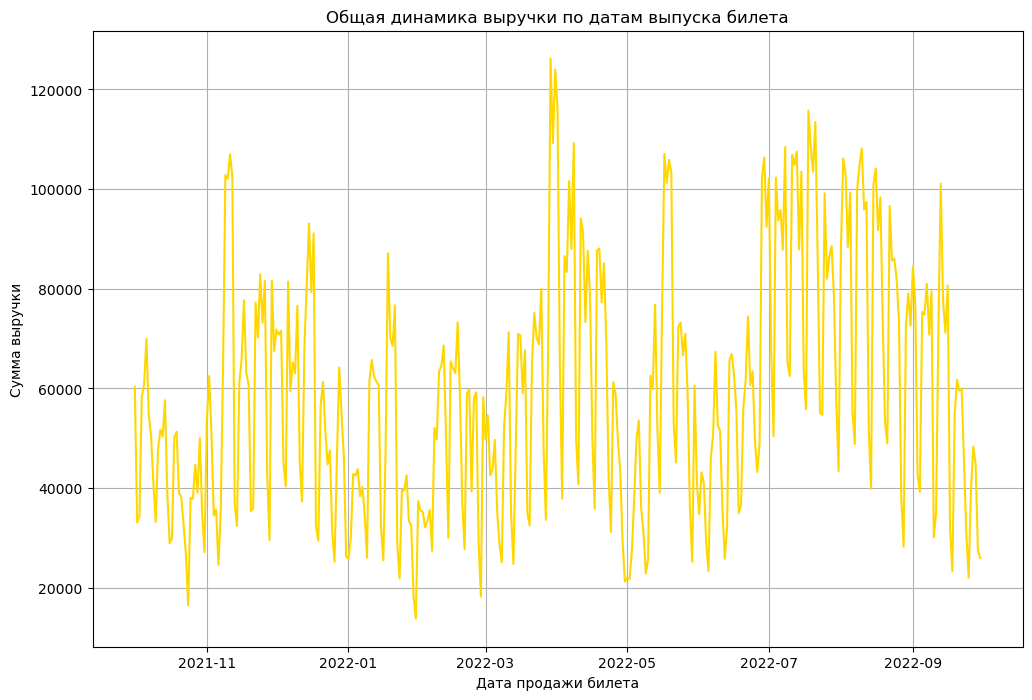

In [80]:
plt.figure(figsize=(12, 8))
plt.plot(df_grouped_by_revenue.index, df_grouped_by_revenue.values, label='Выручка', color='#FFD700')
plt.title('Общая динамика выручки по датам выпуска билета')
plt.xlabel('Дата продажи билета')
plt.ylabel('Сумма выручки')
plt.grid(True)
plt.show()

Мини-вывод: по графику в принципе наблюдается сильная волатильность выручки в 2021 и 2022 годах, что отражается различными спросом и стоимость в тех или иных местах и в те или иные времена года. В действительности факторов влияния на выручки в то или иное время огромное множество, в том числе экономическая и политическая ситуации.

##### Динамика выручки по датам покупки билета с детализацией по полю ffp_flag

In [83]:
df_ffp = df[df['ffp_flag'] == True]
df_no = df[df['ffp_flag'] == False]

In [84]:
df_ffp_grouped = df_ffp.groupby('issue_date')['revenue_amount'].sum()
df_no_grouped = df_no.groupby('issue_date')['revenue_amount'].sum()

In [85]:
df_ffp_grouped

issue_date
2021-10-01    22150
2021-10-02    12080
2021-10-03    15570
2021-10-04    24860
2021-10-05    27550
              ...  
2022-09-26     9500
2022-09-27    10700
2022-09-28    16710
2022-09-29     5490
2022-09-30     2640
Name: revenue_amount, Length: 365, dtype: int64

In [86]:
df_no_grouped

issue_date
2021-10-01    38160
2021-10-02    21020
2021-10-03    18750
2021-10-04    33330
2021-10-05    33250
              ...  
2022-09-26    30020
2022-09-27    37650
2022-09-28    28150
2022-09-29    21970
2022-09-30    23340
Name: revenue_amount, Length: 365, dtype: int64

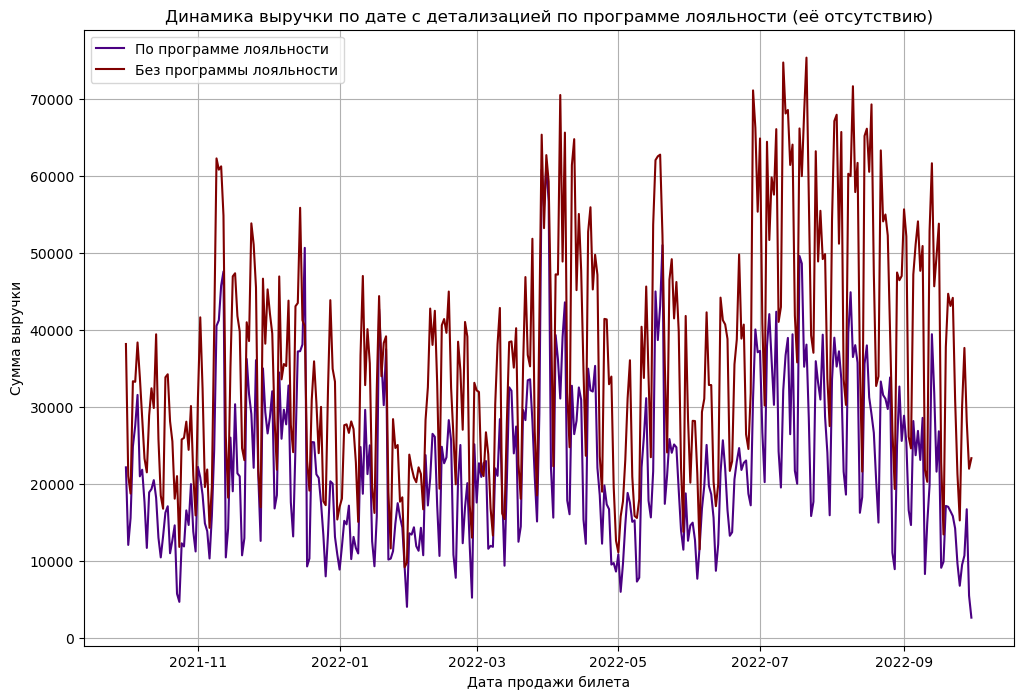

In [87]:
plt.figure(figsize = (12, 8))
plt.plot(df_ffp_grouped, label = 'По программе лояльности', color = '#4B0082')
plt.plot(df_no_grouped, label = 'Без программы лояльности', color = '#800000')
plt.title('Динамика выручки по дате с детализацией по программе лояльности (её отсутствию)')
plt.xlabel('Дата продажи билета')
plt.ylabel('Сумма выручки')
plt.grid(True)
plt.legend()
plt.show()

Мини-вывод: зачастую наблюдается большая склонность к приобретению билетов без использования программы лояльности. Обусловлено это может быть тем, что либо сама программа лояльности отсутствует в некоторых авиакомпаниях или же клиенты часто их меняют и не считают надобным использовать программу лояльности. Конечно, так же они иогут просто-напросто быть неосведосленны о наличии этой программы. В целом, сложно сделать более точные выводы без дополнительных и более ёмких исследований.

##### Динамика выручки по датам покупки билета с детализацией по полю route_flight_type

In [90]:
df['route_flight_type'].unique()

array(['ВВЛ', 'МВЛ'], dtype=object)

In [91]:
df_international = df[df['route_flight_type'] == 'МВЛ'].groupby('issue_date')['revenue_amount'].sum()
df_domestic = df[df['route_flight_type'] == 'ВВЛ'].groupby('issue_date')['revenue_amount'].sum()

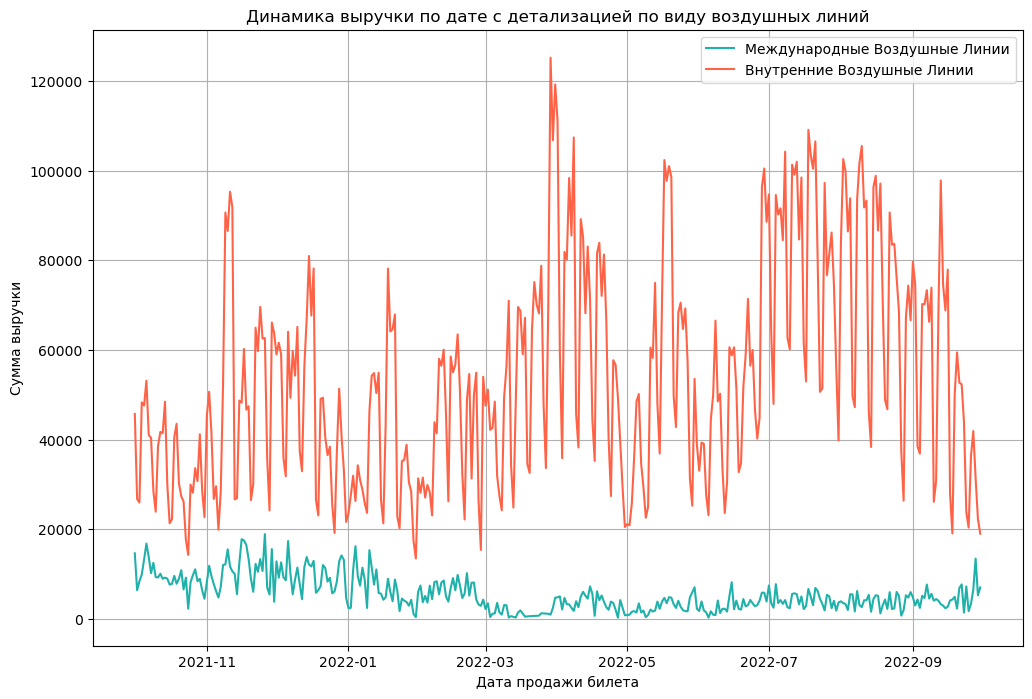

In [92]:
plt.figure(figsize = (12, 8))
plt.plot(df_international, label = 'Международные Воздушные Линии', color = '#20B2AA')
plt.plot(df_domestic, label = 'Внутренние Воздушные Линии', color = '#FF6347')
plt.title('Динамика выручки по дате с детализацией по виду воздушных линий')
plt.xlabel('Дата продажи билета')
plt.ylabel('Сумма выручки')
plt.grid(True)
plt.legend()
plt.show()

Мини-вывод: по графику мы можем сказать о приоритетности и наибольшей популярности внутренних перелётов. Можно бы было сказать, что это связано с политической ситуацией и санкциями, но из видимого это повлияло лишь на выручку по МВЛ, но никак не изменило огромную разницу между МВЛ И ВВЛ. В целом, вероятно, большинство семей распределены внутри России, а также никто не отменял большее количество внутренних стажировок и путешествий по работе, что в целом тоже вписывается в ситуацию на графике.

##### Динамика выручки по датам покупки билета с детализацией по полю sale_type

In [95]:
df['sale_type'].unique()

array(['ONLINE', 'OFFLINE'], dtype=object)

In [96]:
df_online = df[df['sale_type'] == 'ONLINE'].groupby('issue_date')['revenue_amount'].sum()
df_offline = df[df['sale_type'] == 'OFFLINE'].groupby('issue_date')['revenue_amount'].sum()

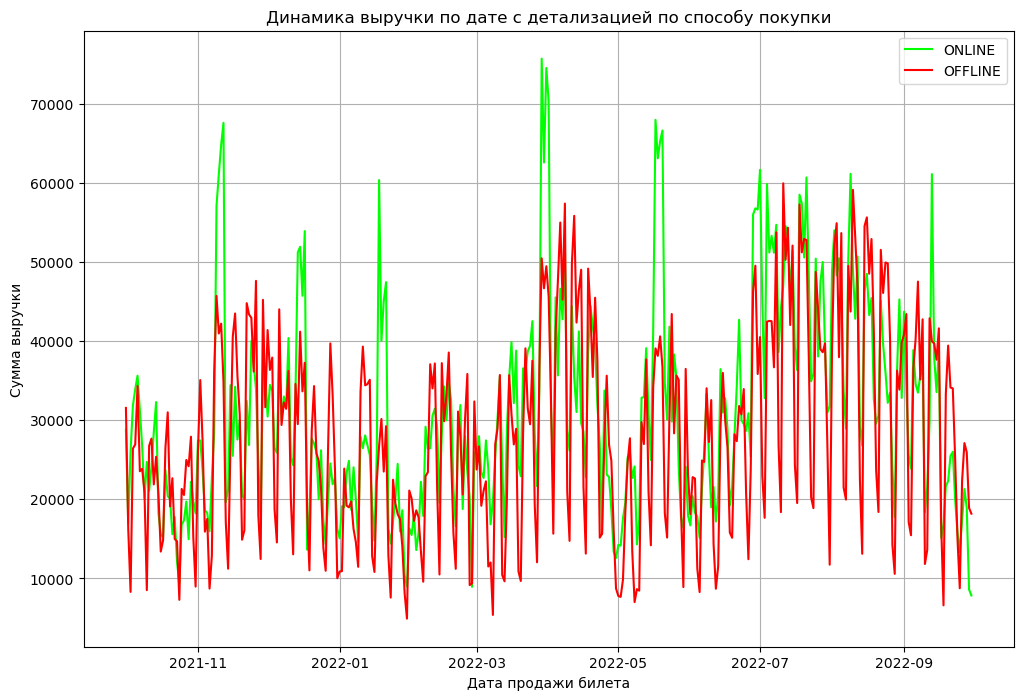

In [97]:
plt.figure(figsize = (12, 8))
plt.plot(df_online, label = 'ONLINE', color = '#00FF00')
plt.plot(df_offline, label = 'OFFLINE', color = '#FF0000')
plt.title('Динамика выручки по дате с детализацией по способу покупки')
plt.xlabel('Дата продажи билета')
plt.ylabel('Сумма выручки')
plt.grid(True)
plt.legend()
plt.show()

Мини-вывод: по графику видно, что бронирование билетов онлайн имеет большую, хоть и незначительно, популярность, нежели покупка офлайн. Связано это может быть с лёгкость отслеживания стоимости билетов и наличием более удобной возможности проводить их сравнение. Тем не менее, под конец цикла можно увидеть снижение популярности онлайн бронирования - сложно сказать, с чем это связано - пониженное доверие к онлайн заказам, возможно, что аудитория этих онлайн заказов стала просто реже летать или переехала в другую страну.

##### Динамика выручки по датам покупки билета с детализацией по полю pax_type

In [100]:
df['pax_type'].unique()

array(['AD', 'CHD', 'INF'], dtype=object)

In [101]:
df_adult = df[df['pax_type'] == 'AD'].groupby('issue_date')['revenue_amount'].sum()
df_child = df[df['pax_type'] == 'CHD'].groupby('issue_date')['revenue_amount'].sum()
df_undefined = df[df['pax_type'] == 'INF'].groupby('issue_date')['revenue_amount'].sum()

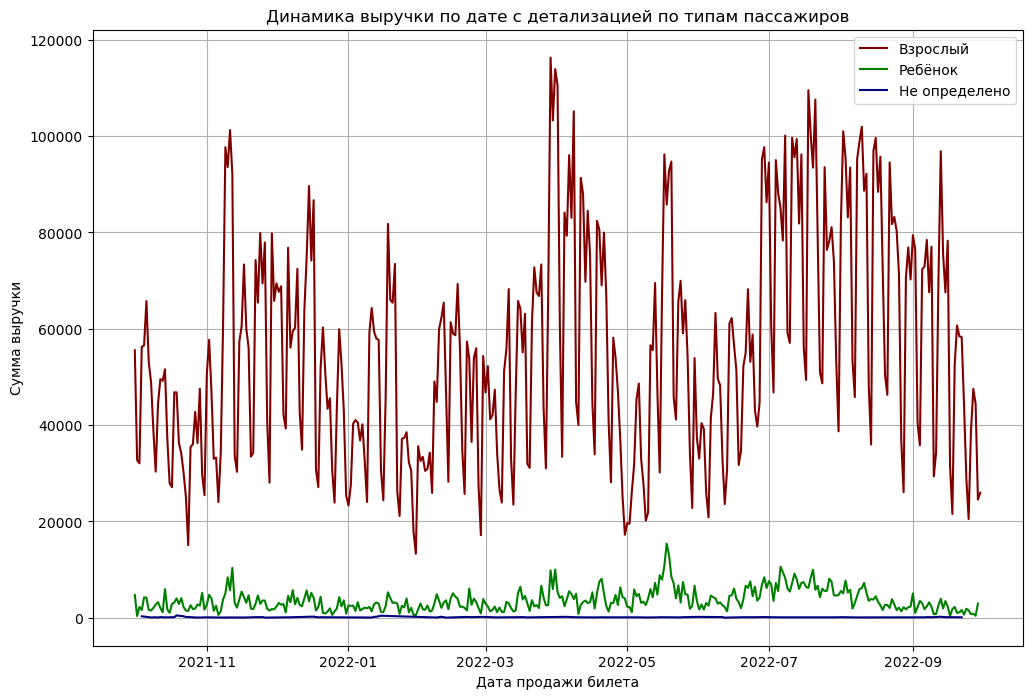

In [102]:
plt.figure(figsize = (12, 8))
plt.plot(df_adult, label = 'Взрослый', color = '#800000')
plt.plot(df_child, label = 'Ребёнок', color = '#008000')
plt.plot(df_undefined, label = 'Не определено', color = '#000080')
plt.title('Динамика выручки по дате с детализацией по типам пассажиров')
plt.xlabel('Дата продажи билета')
plt.ylabel('Сумма выручки')
plt.grid(True)
plt.legend()
plt.show()

Мини-вывод: как видно из графика, основная часть выручки поступает от взрослых пассажиров (отмечены коричневой линией). Их выручка значительно превышает выручку от других типов пассажиров, что ожидаемо, так как взрослые обычно составляют основную категорию клиентов. Выручка от взрослых пассажиров довольно сильно колеблется во времени, с частыми пиками и падениями. Это может указывать на сезонные колебания или другие факторы (например, акции, праздники или школьные каникулы). Выручка, связанная с категорией "не определено" (синяя линия), незначительна и практически не влияет на общую картину.

#### 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.

In [105]:
df['revenue_amount'].describe()

count    49365.000000
mean       437.631723
std        214.604891
min         10.000000
25%        290.000000
50%        400.000000
75%        550.000000
max       5200.000000
Name: revenue_amount, dtype: float64

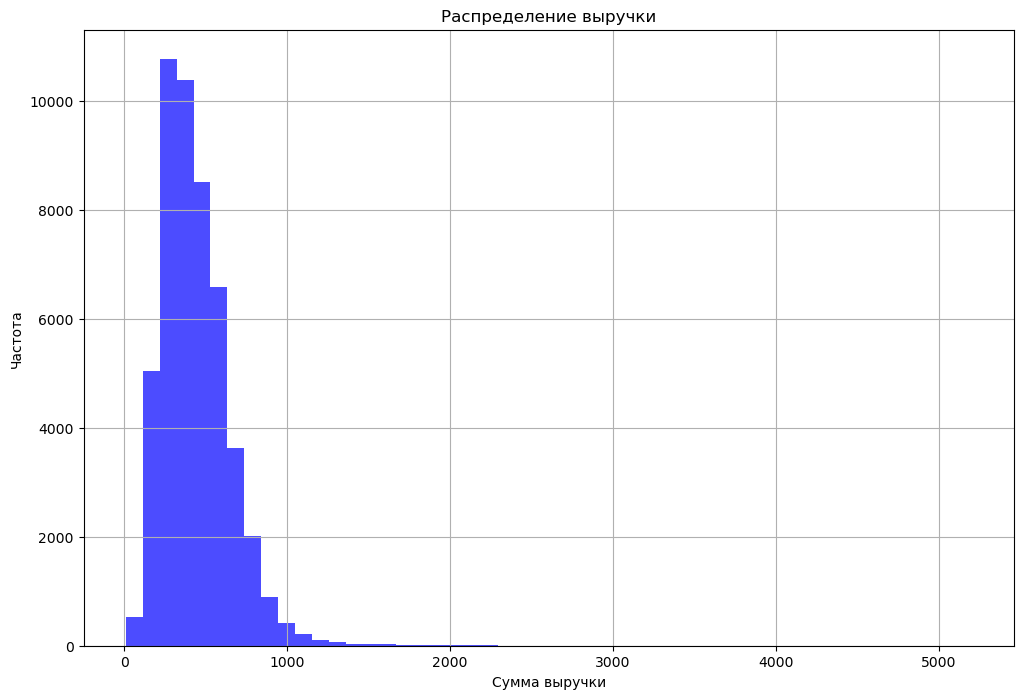

In [106]:
plt.figure(figsize=(12, 8))
plt.hist(df['revenue_amount'], bins=50, color='blue', alpha=0.7)
plt.title('Распределение выручки')
plt.xlabel('Сумма выручки')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

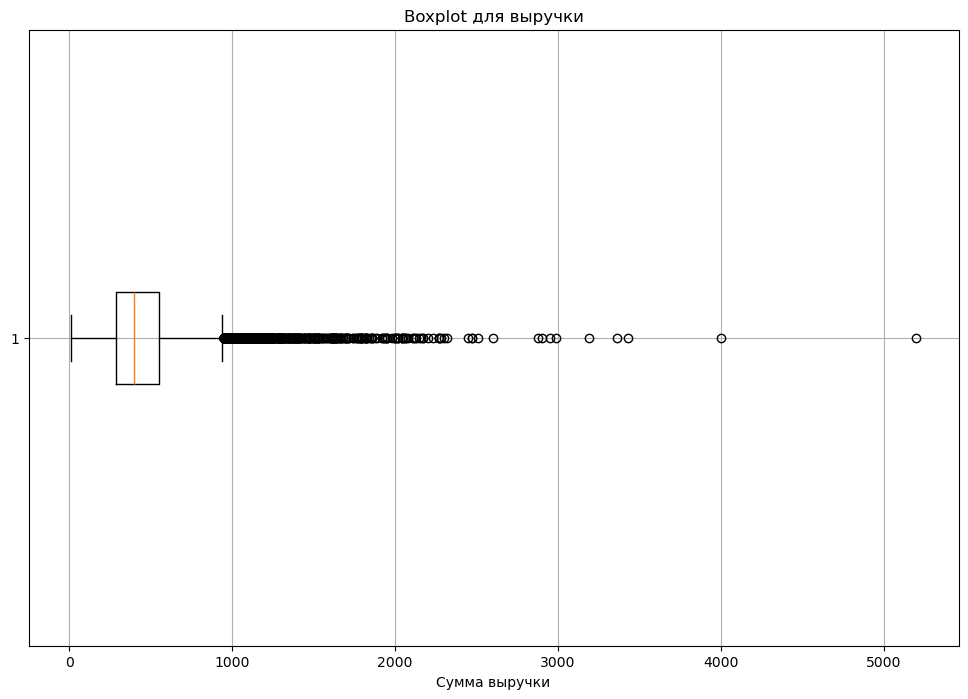

In [107]:
plt.figure(figsize=(12, 8))
plt.boxplot(df['revenue_amount'], vert=False)
plt.title('Boxplot для выручки')
plt.xlabel('Сумма выручки')
plt.grid(True)
plt.show()

<div style="background-color:#abebc6 ; padding:10px; border-radius:5px;">
    Дополнительно с помощью теста исследую на нормальность.
</div>

In [109]:
result = st.anderson(df['revenue_amount'], dist='norm')

# Асимметрия
skewness = df['revenue_amount'].skew()

# Эксцесс
kurtosis = df['revenue_amount'].kurtosis()

print(f"Андерсон-Дарлинг: Статистика = {result.statistic}")
print("Критические значения:", result.critical_values)
print(f"Асимметрия: {skewness}")
print(f"Эксцесс: {kurtosis}")

Андерсон-Дарлинг: Статистика = 644.386472799255
Критические значения: [0.576 0.656 0.787 0.918 1.092]
Асимметрия: 2.074877949405603
Эксцесс: 15.755295960527409


<div style="background-color:#f6ddcc ; padding:10px; border-radius:5px;">
Мини-выводы относительно нормальности/ненормальности.
Поскольку значение статистики Андерсона-Дарлинга (644.39) значительно выше всех критических значений, это говорит о том, что нулевая гипотеза о нормальности данных отвергается на всех уровнях значимости (включая даже 1%). Это указывает на то, что данные очень сильно отклоняются от нормального распределения. Положительная асимметрия = 2.07 говорит о том, что распределение смещено вправо, что означает наличие длинного хвоста с правой стороны. Высокий положительный эксцесс = 15.76 указывает на "тяжёлые хвосты", т.е. распределение имеет экстремальные значения (выбросы) гораздо чаще, чем нормальное распределение. Нормальное распределение имеет эксцесс, равный 0 (после приведения), в то время как 15.76 — это очень высокое значение, указывающее на высокую остроконечность. Ну и отсюда следует два вывода: распределение данных не является нормальным и данные имеют значительные выбросы и правостороннюю асимметрию.
</div>

In [111]:
Q1 = df['revenue_amount'].quantile(0.25)
Q3 = df['revenue_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Первый квартиль:', Q1)
print('Третий квартиль:', Q3)
print('Межквартильный размах:', IQR)
print('Нижняя граница:', lower_bound)
print('Верхняя граница:', upper_bound)

Первый квартиль: 290.0
Третий квартиль: 550.0
Межквартильный размах: 260.0
Нижняя граница: -100.0
Верхняя граница: 940.0


In [112]:
outliers = df[(df['revenue_amount'] < lower_bound) | (df['revenue_amount'] > upper_bound)]
outliers

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
15,2022-01-07,2022-01-15,AD,1090,GDZ,MOW,ВВЛ,False,OFFLINE
81,2022-01-07,2022-01-08,AD,1820,OVB,KHV,ВВЛ,False,OFFLINE
120,2021-12-06,2022-01-15,AD,1030,BKK,KHV,МВЛ,True,OFFLINE
167,2021-12-12,2022-01-04,AD,960,MOW,AER,ВВЛ,False,ONLINE
216,2021-12-24,2022-01-02,AD,2000,IKT,MOW,ВВЛ,False,OFFLINE
...,...,...,...,...,...,...,...,...,...
49625,2021-10-16,2021-12-20,AD,1310,VVO,HKT,МВЛ,True,ONLINE
49733,2022-04-15,2022-05-04,AD,960,HTA,MOW,ВВЛ,False,OFFLINE
49824,2022-04-08,2022-05-21,AD,970,VVO,OVB,ВВЛ,True,OFFLINE
49968,2022-06-28,2022-06-30,AD,950,MOW,HTA,ВВЛ,False,OFFLINE


In [113]:
codes[codes['IATA'] == 'GDZ']

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
5255,6933,Gelendzhik Airport,Gelendzhik,Russia,GDZ,URKG,44.582093,38.012481,98,3,N,Europe/Moscow,airport,OurAirports


In [114]:
df_gdz = df[(df['orig_city_code'] == 'GDZ') | (df['dest_city_code'] == 'GDZ')]
df_gdz

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
15,2022-01-07,2022-01-15,AD,1090,GDZ,MOW,ВВЛ,False,OFFLINE
23,2021-12-09,2022-01-02,AD,450,MOW,GDZ,ВВЛ,True,ONLINE
114,2021-11-28,2022-01-09,CHD,390,GDZ,MOW,ВВЛ,False,OFFLINE
192,2021-12-13,2022-01-03,CHD,370,MOW,GDZ,ВВЛ,False,ONLINE
229,2021-12-08,2022-01-06,AD,230,MOW,GDZ,ВВЛ,False,ONLINE
...,...,...,...,...,...,...,...,...,...
48611,2021-10-13,2021-10-23,AD,210,GDZ,MOW,ВВЛ,True,OFFLINE
48713,2021-10-19,2021-10-20,AD,220,GDZ,MOW,ВВЛ,True,ONLINE
49476,2021-12-17,2021-12-22,AD,430,GDZ,MOW,ВВЛ,False,OFFLINE
49589,2021-10-03,2021-12-31,CHD,270,MOW,GDZ,ВВЛ,False,ONLINE


In [115]:
df_gdz['revenue_amount'].unique()

array([1090,  450,  390,  370,  230,  130,  250,  240,  260,  140,  280,
        270,  310,  150,  300,  340,  290,  110,  180,  540,  480,  190,
        160,  530,  170,  320,  210,  220,  420,  430,  100,  330,  460,
        600,   80,  360,  200,  500,  350], dtype=int64)

In [116]:
outliers['revenue_amount'].unique()

array([1090, 1820, 1030,  960, 2000,  950, 1140, 1200, 1110,  970, 1180,
       1070, 1690, 1930, 2990, 1780,  980, 1620, 1150, 1160, 1040, 1760,
       1320, 1020, 2270,  990, 1260, 1080, 1940, 1060, 1280, 1190, 1470,
       1810, 1520, 1010, 1000, 1360, 1340, 1220, 1980, 1530, 1330, 2300,
       1450, 1630, 1510, 2060, 1590, 1120, 1500, 1860, 1250, 1050, 1660,
       1460, 1610, 2050, 1100, 1580, 1240, 1170, 1740, 1300, 3190, 2120,
       2950, 1490, 2040, 1210, 1710, 1600, 1410, 1350, 1790, 1880, 1720,
       1640, 1920, 1130, 1290, 1480, 1670, 2010, 1270, 2170, 1950, 1570,
       1830, 1420, 2320, 2020, 1700, 3430, 2900, 4000, 1890, 2470, 2110,
       2510, 1400, 1310, 1680, 2280, 1230, 1380, 5200, 1650, 2080, 1370,
       2880, 1540, 2130, 2230, 1560, 1390, 2070, 2200, 1550, 1800, 3360,
       1440, 1770, 1430, 1840, 1850, 2150, 2600, 2160, 2450], dtype=int64)

In [117]:
outliers_count = outliers.shape[0]
df_count = df.shape[0]
print('Количество выбросов:', outliers_count)
print('Общее количество строк:', df_count)
print('Доля выбросов в %:', outliers_count / df_count * 100)

Количество выбросов: 987
Общее количество строк: 49365
Доля выбросов в %: 1.999392281981161


In [118]:
df_cleaned = df[(df['revenue_amount'] >= lower_bound) & (df['revenue_amount'] <= upper_bound)]

In [119]:
df_cleaned

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,False,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,True,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,False,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,False,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,True,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,False,OFFLINE


In [120]:
df.shape[0]

49365

In [121]:
df_cleaned.shape[0]

48378

In [122]:
df['revenue_amount'].mean()

437.6317228805834

In [123]:
df_cleaned['revenue_amount'].mean()

421.9422051345653

Вывод:
- В данном пункте была найдена доля выбросов, которая составила почти 2%, но в дальнейшем производилась работы с датасетом без их удаления. Во-первых, мне показалось, что для этого недостаточно оснований, ибо значения не выходят за рамки адекватности и могут в действительности не являться ошибками, то есть, например, быть билетом в бизнес-класс, хотя в данном случае не совсем понятно, в какой валюте указаны значения по столбцу revenue_amount, или же большими заказами. Во-вторых, они в целом составляют незначительную долю всего датасета и не сильно повлияют на результат исследования. Значения, найденные в этом пункте указаны ниже.
- Первый квартиль: 290.0
- Третий квартиль: 550.0
- Межквартильный размах: 260.0
- Нижняя граница: -100.0
- Верхняя граница: 940.0
- Количество выбросов: 987
- Общее количество строк: 49365
- Доля выбросов в %: 1.999392281981161
- Относительно графика распределения, то оно похлже на распределение с правосторонней ассиметрией. Значения ниже нуля и нуль отсутствуют - они были убраны в последнем подпункте первого пункта.
- Относительно boxplot'а, то он лишь подверждает правостороннюю ассиметрию и показывает графически все те значения, которые были написаны до этого.

<div style="background-color:#f1948a ; padding:10px; border-radius:5px;">
    Вариант с минимизацией потерь:
</div>

Не знаю, нужно ли просто написать или реализовать на примере, но я напиши, а если понадобится реализую.
1. Во-первых, мы можем удалить выбросы, однако это может исказить наши данные. Это тот вариант, от которого я отказался, хотя количество выбросов и попадает под количество, которое зачастую принято просто удалять (в разных вариантах это 2-5%).
2. Вероятно, наилучшим вариантом является замена выбросов на медиану, которая наименее чувствительна к экстремальным значениям. И она в принципе является лучшим вариантом, если данные имеют ассиметрию и, опять же, выбросы. Про правостороннюю ассиметрию было доказано/показано ранее.
3. Варианты с модой и средним значением здесь не подходят в связи с их особенностью применения в иных случаях.
4. Ну и последний, по моему мнению, тоже подходящий вариант - это заменить на граничные значения IQR (lower_bound и upper_bound). В данном случае наилучшим вариантом, по моему, было бы заменить на верхнюю границу, ибо все выбросы находятся выше неё.

Отсюда, наилучшими вариантами было бы заменить либо на медиану, либо на верхнюю границу IQR.

#### 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.

In [128]:
df.head(5)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,False,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,True,OFFLINE


In [129]:
df['month'] = df['issue_date'].dt.month

In [130]:
df.head(3)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,12
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE,12
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE,11


Создадим функцию для определения сезона на основе месяца.

In [132]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

In [133]:
# Применяем функцию для создания столбца с сезонами
df['season'] = df['month'].apply(get_season)

In [134]:
df.head(3)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,12,Winter
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE,12,Winter
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE,11,Autumn


In [135]:
season_counts = df['season'].value_counts()
season_counts

season
Summer    13399
Autumn    12435
Spring    11923
Winter    11608
Name: count, dtype: int64

In [136]:
colors = ['#66CDAA', '#DAA520', '#FFA500', '#F0FFFF']

<div style="background-color:#abebc6 ; padding:10px; border-radius:5px;">
    Добавил подписи к графику.
</div>

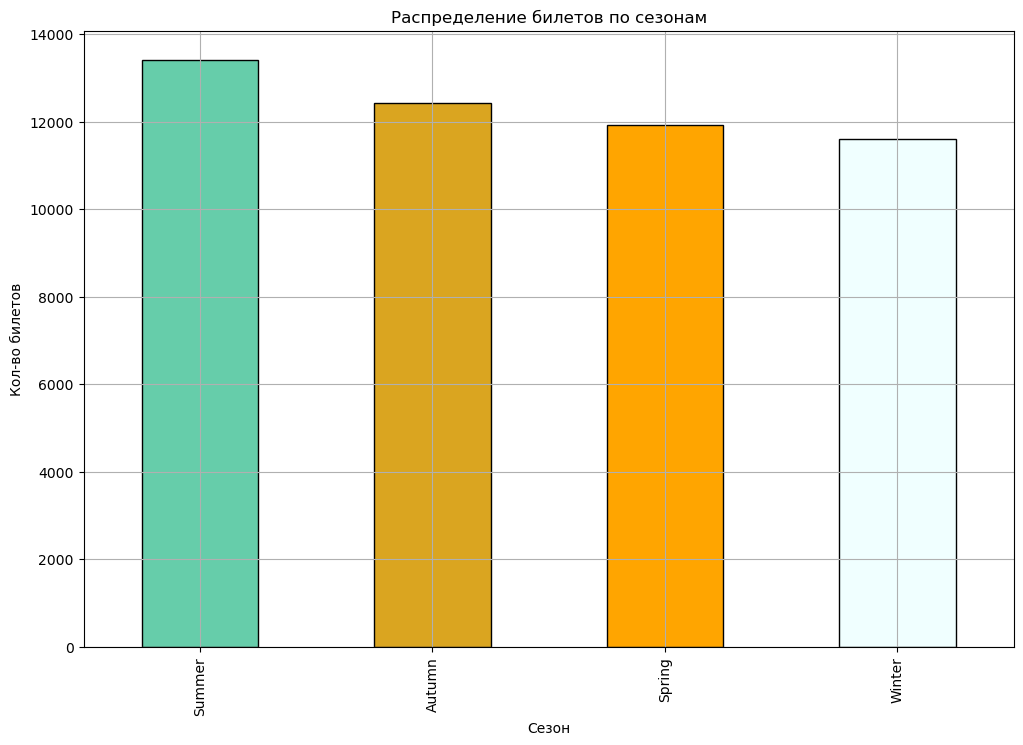

In [138]:
season_counts.plot(kind = 'bar', edgecolor = 'black', figsize = (12, 8), color = colors)
plt.title('Распределение билетов по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Кол-во билетов')
plt.grid(True)
plt.show()

Мини-вывод: созданная функция разбила эти полёты по сезонам, примерное распределение полётов по ним можно увидеть на столбчатой диаграмме сверху. Видно очевидное большинство за летом, что неудивительно, но разрыв в действительности не такой большой, и стабильность полётов +/- сохранятеся каждый сезон, достигая всплеска летом.

In [140]:
revenue_by_month = df.groupby('month')['revenue_amount'].sum()
revenue_by_month

month
1     1352390
2     1348210
3     1826430
4     2032570
5     1714240
6     1614500
7     2638430
8     2471260
9     1669310
10    1327840
11    1851260
12    1757250
Name: revenue_amount, dtype: int64

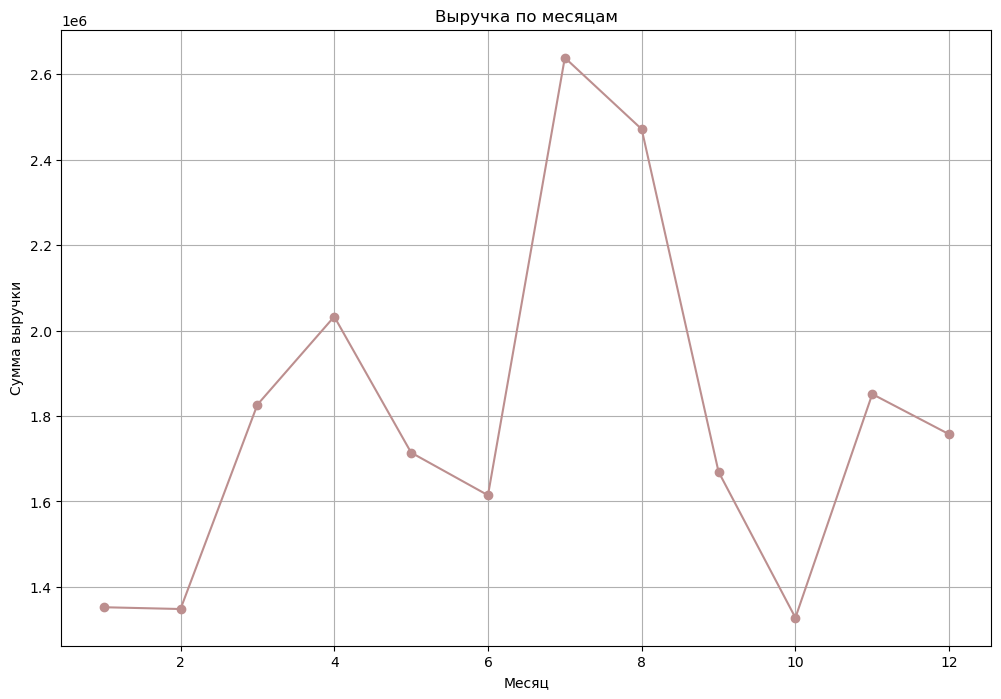

In [141]:
plt.figure(figsize=(12, 8))
plt.plot(revenue_by_month.index, revenue_by_month.values, label='Выручка', color='#BC8F8F', marker = 'o')
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма выручки')
plt.grid(True)
plt.show()

Мини-вывод: по графику виден огромный отрыв в выручке в июле-августе, что логиески объясняется тем, что именно в это время многие летят на отдых или же в родные края. Третье место по выручке занимает апрель, что можно попробовать объяснить ранними полётами на отдых или же какими-либо факторам, связанными с окончанием зимы. Тем не менее я бы так же выделил высокую популярность передётов в декабре, что связано с натуплением новго года и дополнительными полётами на отдых - подтверждение этого можно будет увидеть на графике выручки.

In [143]:
sales_by_month = df.groupby('month')['revenue_amount'].count() #можно также через size() без выделения столбца
sales_by_month

month
1     3589
2     3454
3     4326
4     3974
5     3623
6     3353
7     5259
8     4787
9     3648
10    3615
11    5172
12    4565
Name: revenue_amount, dtype: int64

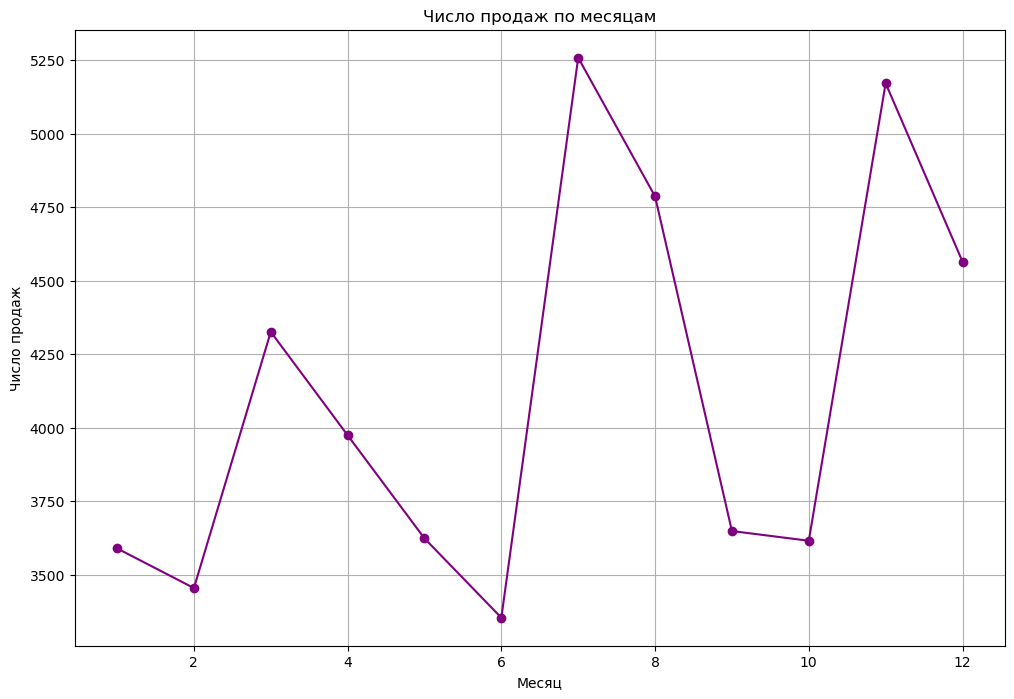

In [144]:
plt.figure(figsize=(12, 8))
plt.plot(sales_by_month.index, sales_by_month.values, label='Число продаж', color='#800080', marker = 'o')
plt.title('Число продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Число продаж')
plt.grid(True)
plt.show()

Мини-вывод: на этом графике мы можем наблюдать пиковые значения выручки в июле-августе и ноябре-декабре. Также на третьем месте по выручке период с марта по апрель.

<div style="background-color:#abebc6 ; padding:10px; border-radius:5px;">
    Изменил вид теста на U-тест Манна-Уитни. Он больше подходит для данных с ненормальным распределением и менее чувствителен к выбросам, особенно в том случае, когда мы оставляем эти выбросы нетронутыми, ибо они, по сути, не являются ошибками, однако, конечно, могут искажать данные. 
</div>

In [147]:
revenue_autumn = df[df['season'] == 'Autumn']['revenue_amount']
revenue_winter = df[df['season'] == 'Winter']['revenue_amount']

t_stat, p_value = st.mannwhitneyu(revenue_autumn, revenue_winter, alternative='two-sided')

In [148]:
print('U-statistics:', t_stat)
print('P-value:', p_value)

U-statistics: 72740603.5
P-value: 0.290916922864215


In [149]:
if p_value < 0.05:
    print("Гипотеза отвергается: выручка между зимой и осенью статистически значимо отличается.")
else:
    print("Гипотеза не отвергается: выручка между зимой и осенью не отличается значимо.")

Гипотеза не отвергается: выручка между зимой и осенью не отличается значимо.


In [150]:
correlation = revenue_by_month.corr(sales_by_month)

print('Корреляция между выручкой и количеством продаж по месяцам =', correlation)

Корреляция между выручкой и количеством продаж по месяцам = 0.7779810384122383


Корреляция = 0.778: Это значение показывает сильную положительную корреляцию между выручкой и количеством продаж по месяцам. Корреляция близка к 1, что означает, что выручка и количество продаж имеют тенденцию изменяться в одном направлении — с увеличением количества продаж увеличивается и выручка.

Вывод:
- Различие в выручке между осенью и зимой статистически значимо, что может быть связано с сезонными факторами (например, увеличение продаж в зимние месяцы из-за праздников или отдыхом, который в России популярен не только летом, но и зимой - происходит это в связи с сильным климатическим различием с регионами отдыха).
- Сильная положительная корреляция между выручкой и количеством продаж по месяцам показывает, что основным фактором, влияющим на выручку, является объем продаж. Это говорит о том, что рост продаж напрямую увеличивает доход компании.

#### 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.

In [154]:
df.columns

Index(['issue_date', 'flight_date_loc', 'pax_type', 'revenue_amount',
       'orig_city_code', 'dest_city_code', 'route_flight_type', 'ffp_flag',
       'sale_type', 'month', 'season'],
      dtype='object')

Если задание правильно понято, то разобьём клиентов на 3 группы: 
- Раннее бронирование - пусть это будет более 30 дней;
- Среднесрочное бронирование - от 7 дней (не включительно) до 30 дней включительно;
- Последние брони - пусть это будет от 0 до 7 дней включтельно.

In [156]:
df.head(3)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,12,Winter
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE,12,Winter
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE,11,Autumn


Добавим столбец с количеством дней от покупки билета до вылета.

In [158]:
df['days_to_flight'] = (df['flight_date_loc'] - df['issue_date']).dt.days

In [159]:
df.head(3)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,days_to_flight
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,12,Winter,35
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE,12,Winter,3
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE,11,Autumn,37


In [160]:
df['days_to_flight'].unique()

array([ 35,   3,  37,  28,  46,  34,  40,  39,  49,  45,  26,  42,   8,
        48,  38,  36,  20,   4,  24,  25,  55,  54,  41,  60,  10,  32,
        47,  53,  12,  52,  33,  22,  17,  30,   7,  31,  56,  27,  23,
         1,  15,  43,  29,  51,  57,  63,  50,  21,   6,  19,   5,   9,
        44,   2,  18,  13,  16,  14,  11,   0,  75,  74,  58, 123,  62,
       118, 297, 110, 109, 251, 291, 293, 265, 304, 264, 282, 242, 262,
       268, 243, 128, 244, 230, 235, 245, 228, 249, 229, 221, 186, 231,
       248, 208, 215, 202, 198, 222, 199, 169, 195, 216, 173, 207, 179,
       196, 220, 212, 214, 209, 200, 217, 201, 203, 226, 187, 178, 192,
       177, 204, 189, 180, 175, 190, 205, 184, 163, 181, 174,  94,  67,
       191, 172, 156, 188, 136, 183, 171, 182,  86, 134, 170, 159, 176,
       194,  68, 165, 168, 121, 105, 137, 152, 143, 154, 116, 114, 151,
       139, 125, 160, 157, 162, 146, 145, 153,  66, 140, 148, 149, 166,
       135, 150, 147, 141, 124, 133, 126, 131, 144, 115, 138, 11

Добавим разделение по трем группам через функцию. Полученное значения будет отправлено в новый столбец для каждой строки.

In [162]:
def classify_days_to_flight(days):
    if days > 30:
        return 'Раннее бронирование'
    elif days > 7:
        return 'Среднесрочное бронирование'
    else:
        return 'Последние брони'

In [163]:
df['order_group'] = df['days_to_flight'].apply(classify_days_to_flight)

In [164]:
df.head(3)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,days_to_flight,order_group
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,12,Winter,35,Раннее бронирование
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE,12,Winter,3,Последние брони
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE,11,Autumn,37,Раннее бронирование


Так как надо проверить гипотезу различия между теми, кто покупает билеты заранее, и теми, кто покупает их в последний момент, то пусть этими группами будут "раннее бронирование" и "последние брони" соответственно.

In [166]:
df['order_group'].unique()

array(['Раннее бронирование', 'Последние брони',
       'Среднесрочное бронирование'], dtype=object)

<div style="background-color:#abebc6 ; padding:10px; border-radius:5px;">
    Здесь я также изменил вид теста. Причина та же.
</div>

In [168]:
revenue_early = df[df['order_group'] == 'Раннее бронирование']['revenue_amount']
revenue_latest = df[df['order_group'] == 'Последние брони']['revenue_amount']

t_stat, p_value = st.mannwhitneyu(revenue_early, revenue_latest, alternative='two-sided')

print('U-statistics:', t_stat)
print('P-value:', p_value)

U-statistics: 116748876.5
P-value: 1.2023810997161193e-34


In [169]:
if p_value < 0.05:
    print("Гипотеза отвергается: выручка между группами раннее бронирование и последние брони статистически значимо отличается.")
else:
    print("Гипотеза не отвергается: выручка между группами раннее бронирование и последние брони не отличается значимо.")

Гипотеза отвергается: выручка между группами раннее бронирование и последние брони статистически значимо отличается.


In [170]:
filtered_df = df[df['order_group'] == '']

In [171]:
filtered_df = df[df['order_group'].isin(['Раннее бронирование', 'Последние брони'])]

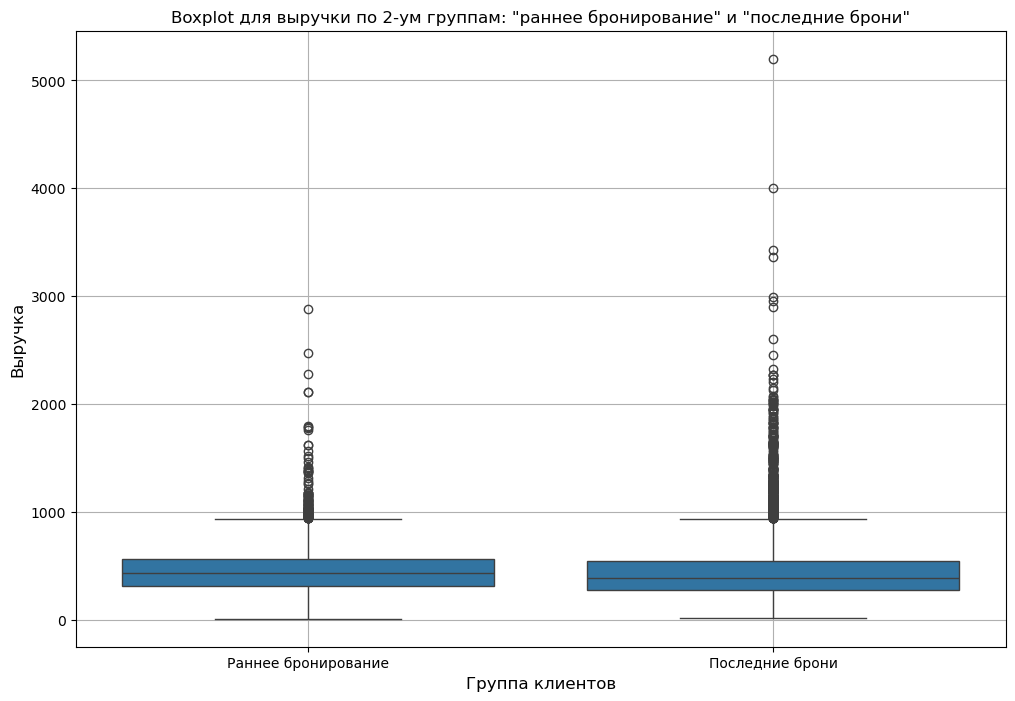

In [172]:
# Построение boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='order_group', y='revenue_amount', data=filtered_df)
plt.title('Boxplot для выручки по 2-ум группам: "раннее бронирование" и "последние брони"', fontsize = 12)
plt.xlabel('Группа клиентов', fontsize = 12)
plt.ylabel('Выручка', fontsize = 12)
plt.grid(True)
plt.show()

Как мы видим, выбросов в группе "Последние брони" больше, и сами по себе они тоже больше. Вероятно, это может свидетельствовать о большей стоимости некоторых таких покупок (речь про возможные дорогие билеты на некоторые направление, ибо приходиться выбирать иногда из сотавшихся мест; в принципе, это лишь единичные пример и факторов может быть больше), не смотря на наличие горячих билетов, которые среди последней брони явно составляют большую долю.

Также немного дополнительных выводов:
- Для обеих групп медиана выручки примерно одинакова и находится немного ниже 500 единиц.
- В целом, медианы и основные диапазоны выручки для обеих групп практически одинаковы, что указывает на схожие средние показатели выручки.
- Наличие значительных выбросов у обеих групп говорит о том, что у них, хоть и достаточно редко, но происходят крупные покупки, которые увеличивают выручку.

In [174]:
revenue_by_group = df.groupby('order_group')['revenue_amount'].mean()

print("Средняя выручка по группам:\n", revenue_by_group)

Средняя выручка по группам:
 order_group
Последние брони               433.502825
Раннее бронирование           446.949170
Среднесрочное бронирование    437.511570
Name: revenue_amount, dtype: float64


- Тип бронирования оказывает некоторое влияние на выручку, однако разница в средней выручке между группами относительно небольшая.
- Раннее бронирование приносит больше выручки, что может говорить о готовности клиентов платить больше за уверенность в своих планах.
- Последние брони приносят немного меньше выручки, возможно, из-за скидок или срочных предложений для заполнения рейсов.

Дополнительно:

<div style="background-color:#c0392b ; padding:10px; border-radius:5px;">
ANOVA-тест был удален по тем же причинам, что и ttest_ind
</div>

<div style="background-color:#f9e79f ; padding:10px; border-radius:5px;">
Измененные выводы:
</div>

- Клиенты были разбиты на 3 группы: раннее бронирование, среднесрочное бронирование, последние брони. Условия этой группировки указаны выше.
- Значение P-value = 1.2023810997161193e-34. Значение близко к нулю и значительно меньше стандартного уровня значимости (например, 0.05). Такое маленькое P-значение позволяет отвергнуть нулевую гипотезу о том, что распределения выручки в группах "Раннее бронирование" и "Последние брони" одинаковы. Следовательно, можно утверждать, что разница между выручками этих групп статистически значима.

#### 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета: https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

Данный в условии пункта датасет уже загружен как codes, так что просто используем его для выполнения задания.

In [182]:
codes.head(5)

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


Для начала вернусь к махинациям из начала файл, но немного более структурно и компактно.

In [184]:
df.head(3)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,days_to_flight,order_group
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,12,Winter,35,Раннее бронирование
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE,12,Winter,3,Последние брони
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE,11,Autumn,37,Раннее бронирование


In [185]:
# тут можно и через np.union1d(..., ...), но он требует удления пропусков в столбцах, на которое я пока не решился
unique_values = set(df['orig_city_code'].unique()).union(set(df['dest_city_code'].unique()))

In [186]:
difference_between_2_data = unique_values.difference(unique_codes)

print('Значения столбцов с аббревиатурами в датасете df, которых нет в codes:', only_in_udcc)

Значения столбцов с аббревиатурами в датасете df, которых нет в codes: {nan, 'TYO', 'GRV', 'MOW', 'BAK', 'LON', 'TOX', 'BJS', 'PAR', 'NQZ', 'SEL', 'ROM', 'MIL', 'BER'}


Вероятно, это аббрервиатуры городов, в которых находятся аэропорты, так что с помощью ИИ сделаю предположение каких (мой мозг только половину дает угадать). Также почему-то потерялся OHH.
- LON — Лондон, Великобритания (London)
- NQZ — Нур-Султан (Астана), Казахстан (Nursultan Nazarbayev International Airport)
- SEL — Сеул, Южная Корея (Seoul, относится к аэропортам Incheon и Gimpo)
- GRV — Грозный, Россия (Grozny)
- BER — Берлин, Германия (Berlin, относится к аэропорту Berlin Brandenburg)
- BAK — Баку, Азербайджан (Baku, относится к аэропорту Heydar Aliyev International)
- ROM — Рим, Италия (Rome, относится к аэропортам Fiumicino и Ciampino)
- PAR — Париж, Франция (Paris, относится к аэропортам Charles de Gaulle и Orly)
- TOX — Тобольск, Россия (Tobolsk, аэропорт Remezov)
- MIL — Милан, Италия (Milan, относится к аэропортам Malpensa, Linate и Orio al Serio)
- BJS — Пекин, Китай (Beijing, относится к аэропортам Capital и Daxing)
- TYO — Токио, Япония (Tokyo, относится к аэропортам Narita и Haneda)
- MOW — Москва, Россия (Moscow, относится к аэропортам Sheremetyevo, Domodedovo и Vnukovo)
- OHH - USA, Columbus

In [188]:
codes[codes['City'] == 'London'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
172,174,London Airport,London,Canada,YXU,CYXU,43.035599,-81.153900,912,-5,A,America/Toronto,airport,OurAirports
487,492,London Luton Airport,London,United Kingdom,LTN,EGGW,51.874699,-0.368333,526,0,E,Europe/London,airport,OurAirports
497,502,London Gatwick Airport,London,United Kingdom,LGW,EGKK,51.148102,-0.190278,202,0,E,Europe/London,airport,OurAirports
498,503,London City Airport,London,United Kingdom,LCY,EGLC,51.505299,0.055278,19,0,E,Europe/London,airport,OurAirports
502,507,London Heathrow Airport,London,United Kingdom,LHR,EGLL,51.470600,-0.461941,83,0,E,Europe/London,airport,OurAirports
542,548,London Stansted Airport,London,United Kingdom,STN,EGSS,51.884998,0.235000,348,0,E,Europe/London,airport,OurAirports
5766,7722,London Heliport,London,United Kingdom,\N,EGLW,51.469723,-0.179444,18,0,E,Europe/London,airport,OurAirports
6141,8410,London-Corbin Airport/Magee Field,London,United States,LOZ,KLOZ,37.082199,-84.084900,1212,-5,A,America/New_York,airport,OurAirports
6759,10169,Madison County Airport,London,United States,\N,KUYF,39.932701,-83.461998,1082,-5,A,\N,airport,OurAirports


In [189]:
codes[codes['City'] == 'Columbus'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
3474,3674,Rickenbacker International Airport,Columbus,United States,LCK,KLCK,39.813801,-82.927803,744,-5,A,America/New_York,airport,OurAirports
3559,3759,John Glenn Columbus International Airport,Columbus,United States,CMH,KCMH,39.998001,-82.891899,815,-5,A,America/New_York,airport,OurAirports
4007,4255,Columbus Metropolitan Airport,Columbus,United States,CSG,KCSG,32.516300,-84.938904,397,-5,A,America/New_York,airport,OurAirports
5639,7511,The Ohio State University Airport - Don Scott ...,Columbus,United States,OSU,KOSU,40.079800,-83.072998,905,-5,U,America/New_York,airport,OurAirports
6570,9403,Taszár Air Base,Columbus,United States,TZR,LHTA,46.393101,17.917500,531,1,A,Europe/Budapest,airport,OurAirports
7053,11816,Columbus Municipal Airport,Columbus,United States,CLU,KBAK,39.261902,-85.896301,656,\N,\N,\N,airport,OurAirports
7084,11847,Columbus Municipal Airport,Columbus,United States,\N,KOLU,41.448002,-97.342598,1447,\N,\N,\N,airport,OurAirports
7324,12469,Bolton Field,Columbus,United States,\N,KTZR,39.901199,-83.136902,905,4,A,\N,airport,OurAirports


In [190]:
codes[codes['City'] == 'Nur-Sultan'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source


In [191]:
codes[codes['City'] == 'Astana'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source


In [192]:
kazakhstan = codes[codes['Country'] == 'Kazakhstan'] 

In [193]:
kazakhstan['City'].unique()

array(['Alma-ata', 'Balkhash', 'Tselinograd', 'Dzhambul', 'Chimkent',
       'Uralsk', 'Pavlodar', 'Semiplatinsk', 'Aktyubinsk', 'Atyrau',
       'Kzyl-Orda', 'Aktau', 'Karaganda', 'Kokshetau', 'Petropavlosk',
       'Zhezkazgan', 'Ust Kamenogorsk', 'Kostanay', 'Arkalyk',
       'Taldykorgan', 'Baikonur', 'Ekibastuz', 'Ayaguz', 'Chelkar',
       'Urzhar'], dtype=object)

In [194]:
codes[codes['City'] == 'Seoul'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
2271,2378,Gimpo International Airport,Seoul,South Korea,GMP,RKSS,37.558300,126.791000,59,9,U,Asia/Seoul,airport,OurAirports
3725,3930,Incheon International Airport,Seoul,South Korea,ICN,RKSI,37.469101,126.450996,23,9,U,Asia/Seoul,airport,OurAirports


In [195]:
codes[codes['City'] == 'Grozny'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
4761,6122,Khankala Air Base,Grozny,Russia,\N,URMG,43.2981,45.7841,548,3,N,Europe/Moscow,airport,OurAirports


In [196]:
codes[codes['City'] == 'Berlin'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
333,337,Berlin-Schönefeld Airport,Berlin,Germany,SXF,EDDB,52.380001,13.5225,157,1,E,Europe/Berlin,airport,OurAirports
339,343,Berlin-Tempelhof International Airport,Berlin,Germany,THF,EDDI,52.473000,13.4039,167,1,E,Europe/Berlin,airport,OurAirports
347,351,Berlin-Tegel Airport,Berlin,Germany,TXL,EDDT,52.559700,13.2877,122,1,E,Europe/Berlin,airport,OurAirports


In [197]:
codes[codes['City'] == 'Baku'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
2772,2922,Heydar Aliyev International Airport,Baku,Azerbaijan,GYD,UBBB,40.467499,50.046700,10,4,E,Asia/Baku,airport,OurAirports
7675,14087,Zabrat Airport,Baku,Azerbaijan,ZXT,UBTT,40.495542,49.976807,36,\N,\N,\N,airport,OurAirports


In [198]:
codes[codes['City'] == 'Rome'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
1512,1553,Ciampino–G. B. Pastine International Airport,Rome,Italy,CIA,LIRA,41.799400,12.594900,427,1,E,Europe/Rome,airport,OurAirports
1514,1555,Leonardo da Vinci–Fiumicino Airport,Rome,Italy,FCO,LIRF,41.800278,12.238889,13,1,E,Europe/Rome,airport,OurAirports
1523,1565,Urbe Airport,Rome,Italy,\N,LIRU,41.951900,12.498900,55,1,E,Europe/Rome,airport,OurAirports
3251,3450,Griffiss International Airport,Rome,United States,RME,KRME,43.233799,-75.406998,504,-5,A,America/New_York,airport,OurAirports
6073,8294,Richard B Russell Airport,Rome,United States,RMG,KRMG,34.350601,-85.157997,644,-5,A,America/New_York,airport,OurAirports


In [199]:
codes[codes['City'] == 'Paris'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
1344,1380,Paris-Le Bourget Airport,Paris,France,LBG,LFPB,48.969398,2.441390,218,1,E,Europe/Paris,airport,OurAirports
1346,1382,Charles de Gaulle International Airport,Paris,France,CDG,LFPG,49.012798,2.550000,392,1,E,Europe/Paris,airport,OurAirports
1350,1386,Paris-Orly Airport,Paris,France,ORY,LFPO,48.723333,2.379444,291,1,E,Europe/Paris,airport,OurAirports
6857,11095,Cox Field,Paris,United States,PRX,KPRX,33.636600,-95.450798,547,-5,A,\N,airport,OurAirports


In [200]:
codes[codes['City'] == 'Tobolsk'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source


In [201]:
codes[codes['City'] == 'Milan'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
1489,1529,Milano Linate Airport,Milan,Italy,LIN,LIML,45.445099,9.27674,353,1,E,Europe/Rome,airport,OurAirports


In [202]:
codes[codes['City'] == 'Beijing'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
3170,3364,Beijing Capital International Airport,Beijing,China,PEK,ZBAA,40.080101,116.584999,116,8,U,Asia/Shanghai,airport,OurAirports
4973,6341,Beijing Nanyuan Airport,Beijing,China,NAY,ZBNY,39.782799,116.388000,0,8,U,Asia/Shanghai,airport,OurAirports
6766,10209,Beijing Daxing International Airport,Beijing,China,PKX,ZBAD,39.509945,116.410920,98,8,U,\N,airport,OurAirports
7646,13726,Beijing Xijiao Airport,Beijing,China,\N,ZBBB,39.960800,116.257004,0,\N,\N,\N,airport,OurAirports


In [203]:
codes[codes['City'] == 'Tokyo'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
2181,2279,Narita International Airport,Tokyo,Japan,NRT,RJAA,35.764702,140.386002,141,9,U,Asia/Tokyo,airport,OurAirports
2257,2359,Tokyo Haneda International Airport,Tokyo,Japan,HND,RJTT,35.552299,139.779999,35,9,U,Asia/Tokyo,airport,OurAirports
6757,10165,Chofu Airport,Tokyo,Japan,\N,RJTF,35.671700,139.528000,141,9,N,\N,airport,OurAirports


In [204]:
codes[codes['City'] == 'Moscow'] 

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
2827,2985,Sheremetyevo International Airport,Moscow,Russia,SVO,UUEE,55.972599,37.414600,622,3,N,Europe/Moscow,airport,OurAirports
2830,2988,Vnukovo International Airport,Moscow,Russia,VKO,UUWW,55.591499,37.261501,685,3,N,Europe/Moscow,airport,OurAirports
3815,4029,Domodedovo International Airport,Moscow,Russia,DME,UUDD,55.408798,37.906300,588,3,N,Europe/Moscow,airport,OurAirports
4090,4360,Bykovo Airport,Moscow,Russia,BKA,UUBB,55.617199,38.060001,427,3,N,Europe/Moscow,airport,OurAirports
6258,8661,Ostafyevo International Airport,Moscow,Russia,OSF,UUMO,55.511667,37.507222,568,3,N,Europe/Moscow,airport,OurAirports
7223,11986,Myachkovo Airport,Moscow,Russia,\N,UUBM,55.560001,37.985001,410,\N,\N,\N,airport,OurAirports


Предполагаю, что для этих аббревиатур придётся добавить название города вручную, ибо для одной из них значения city вообще нет в датасете, хотя аэропорт в городе существует, что странно.

Список городо и аббревиатур, которые надо будет прописать вручную (или иным способом)
- LON = London
- NQZ = Astana
- SEL = Seoul
- GRV = Grozny
- BER = Berlin
- BAK = Baku
- ROM = Rome
- PAR = Paris
- TOX = Tobolsk
- MIL = Milan
- BJS = Beijing
- TYO = Tokyo
- MOW = Moscow
- OHH = Columbus

In [207]:
# Добавляем недостающие города вручную
additional_cities = {
    'LON': 'London', 'NQZ': 'Astana', 'SEL': 'Seoul', 'GRV': 'Grozny', 'BER': 'Berlin',
    'BAK': 'Baku', 'ROM': 'Rome', 'PAR': 'Paris', 'TOX': 'Tobolsk', 'MIL': 'Milan',
    'BJS': 'Beijing', 'TYO': 'Tokyo', 'MOW': 'Moscow', 'OHH': 'Columbus'
}

In [208]:
codes_cleaned = codes[['IATA', 'City']].dropna()

In [209]:
# Добавляем недостающие коды в существующий датасет о городах
additional_df = pd.DataFrame(list(additional_cities.items()), columns=['IATA', 'City'])
additional_df

,IATA,City
0,LON,London
1,NQZ,Astana
2,SEL,Seoul
3,GRV,Grozny
4,BER,Berlin
5,BAK,Baku
6,ROM,Rome
7,PAR,Paris
8,TOX,Tobolsk
9,MIL,Milan


In [210]:
codes_cleaned.head(3)

,IATA,City
0,GKA,Goroka
1,MAG,Madang
2,HGU,Mount Hagen


In [211]:
code_city = pd.concat([codes_cleaned, additional_df]).drop_duplicates()

In [212]:
code_city.head(3)

,IATA,City
0,GKA,Goroka
1,MAG,Madang
2,HGU,Mount Hagen


In [213]:
df = df.merge(code_city, left_on='orig_city_code', right_on='IATA', how='left')
df = df.rename(columns={'City': 'orig_city'}).drop(columns=['IATA'])

df = df.merge(code_city, left_on='dest_city_code', right_on='IATA', how='left')
df = df.rename(columns={'City': 'dest_city'}).drop(columns=['IATA'])

In [214]:
df.head(3)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,days_to_flight,order_group,orig_city,dest_city
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,12,Winter,35,Раннее бронирование,Moscow,Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE,12,Winter,3,Последние брони,Yuzhno-sakhalinsk,Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE,11,Autumn,37,Раннее бронирование,Kaliningrad,Moscow


In [215]:
missing_city_df_new = df[df['orig_city_code'].isnull() | df['dest_city_code'].isnull()]

In [216]:
missing_city_df_new

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,days_to_flight,order_group,orig_city,dest_city
1995,2022-02-17,2022-03-22,AD,440,NaN,KHV,МВЛ,False,ONLINE,2,Winter,33,Раннее бронирование,NaN,Khabarovsk
8005,2022-05-02,2022-05-11,AD,440,NaN,KHV,МВЛ,False,OFFLINE,5,Spring,9,Среднесрочное бронирование,NaN,Khabarovsk
46979,2022-05-13,2022-07-28,AD,440,KHV,NaN,МВЛ,False,OFFLINE,5,Spring,76,Раннее бронирование,Khabarovsk,NaN


Теперь, пожалуй, заменю пропуски на 'Неизвестно' в столюцах с кодами городов отправления и прибытия и в их интерпретации в двух новых столбцах.

In [218]:
df.isnull().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       2
dest_city_code       1
route_flight_type    0
ffp_flag             0
sale_type            0
month                0
season               0
days_to_flight       0
order_group          0
orig_city            2
dest_city            1
dtype: int64

In [219]:
df.fillna('Неизвестно', inplace=True)

In [220]:
df.isnull().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       0
dest_city_code       0
route_flight_type    0
ffp_flag             0
sale_type            0
month                0
season               0
days_to_flight       0
order_group          0
orig_city            0
dest_city            0
dtype: int64

In [221]:
df.head(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,days_to_flight,order_group,orig_city,dest_city
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,12,Winter,35,Раннее бронирование,Moscow,Kaliningrad


In [222]:
df['route_flight_type'].unique()

array(['ВВЛ', 'МВЛ'], dtype=object)

#### Самые популярные направления перелета (город-город) отдельно для ВВЛ и МВЛ по количеству билетов

In [224]:
top_10_vvl = df[df['route_flight_type'] == 'ВВЛ'].groupby(['orig_city', 'dest_city']).size().nlargest(10)
print("Топ-10 популярных направлений ВМЛ:")
print(top_10_vvl)

Топ-10 популярных направлений ВМЛ:
orig_city       dest_city     
Sochi           Moscow            1341
Moscow          Sochi             1309
St. Petersburg  Moscow            1212
Moscow          St. Petersburg    1192
Novosibirsk     Moscow             972
Moscow          Novosibirsk        956
Kazan           Moscow             760
Moscow          Kazan              758
                Ufa                708
Novosibirsk     Sochi              695
dtype: int64


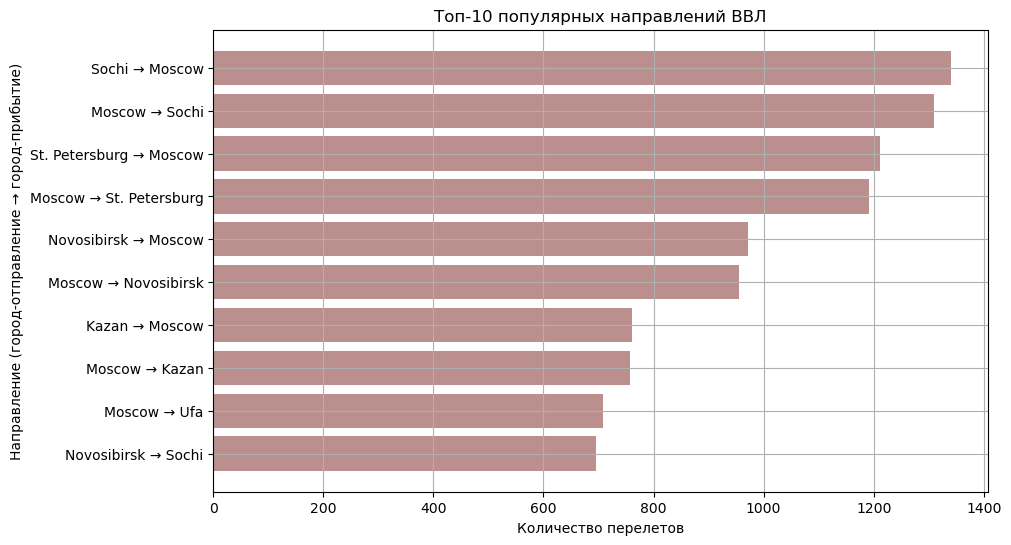

In [225]:
top_10_vvl = top_10_vvl.reset_index()
top_10_vvl['direction'] = top_10_vvl['orig_city'] + ' → ' + top_10_vvl['dest_city']

plt.figure(figsize=(10, 6))
plt.barh(top_10_vvl['direction'], top_10_vvl[0], color='#BC8F8F')
plt.xlabel('Количество перелетов')
plt.ylabel('Направление (город-отправление → город-прибытие)')
plt.title('Топ-10 популярных направлений ВВЛ')
plt.gca().invert_yaxis()  # Чтобы самые популярные направления были сверху
plt.grid(True)
plt.show()

In [226]:
top_10_mvl = df[df['route_flight_type'] == 'МВЛ'].groupby(['orig_city', 'dest_city']).size().nlargest(10)
print("Топ-10 популярных направлений МВЛ:")
print(top_10_mvl)

Топ-10 популярных направлений МВЛ:
orig_city    dest_city  
Moscow       Osh            154
Khudzhand    Moscow         146
Osh          Moscow         136
Moscow       Khudzhand      130
Novosibirsk  Osh            122
             Bishkek        121
Khudzhand    Novosibirsk    116
Osh          Novosibirsk    116
Moscow       Antalya        107
Bishkek      Novosibirsk    102
dtype: int64


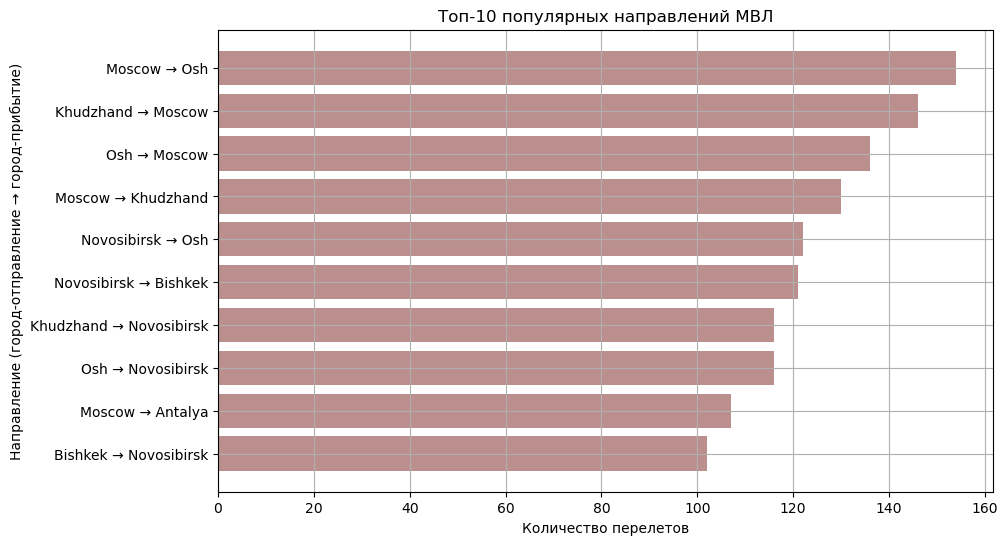

In [227]:
top_10_mvl = top_10_mvl.reset_index()
top_10_mvl['direction'] = top_10_mvl['orig_city'] + ' → ' + top_10_mvl['dest_city']

plt.figure(figsize=(10, 6))
plt.barh(top_10_mvl['direction'], top_10_mvl[0], color='#BC8F8F')
plt.xlabel('Количество перелетов')
plt.ylabel('Направление (город-отправление → город-прибытие)')
plt.title('Топ-10 популярных направлений МВЛ')
plt.gca().invert_yaxis()  # Чтобы самые популярные направления были сверху
plt.grid(True)
plt.show()

#### Самые популярные направления перелета (город-город) отдельно для ВВЛ и МВЛ по выручке

In [229]:
revenue_vvl = df[df['route_flight_type'] == 'ВВЛ'].groupby(['orig_city', 'dest_city'])['revenue_amount'].sum().nlargest(10)
print("\nВыручка по топ-10 направлениям ВМЛ:")
print(revenue_vvl)


Выручка по топ-10 направлениям ВМЛ:
orig_city       dest_city     
Sochi           Moscow            534530
Moscow          Sochi             500770
Novosibirsk     Moscow            467540
Moscow          Novosibirsk       460050
Novosibirsk     Sochi             413700
Sochi           Novosibirsk       365360
Novosibirsk     St. Petersburg    291070
St. Petersburg  Moscow            282110
Moscow          St. Petersburg    275790
St. Petersburg  Novosibirsk       273990
Name: revenue_amount, dtype: int64


In [230]:
revenue_vvl = revenue_vvl.reset_index()
revenue_vvl['direction'] = revenue_vvl['orig_city'] + ' → ' + revenue_vvl['dest_city']

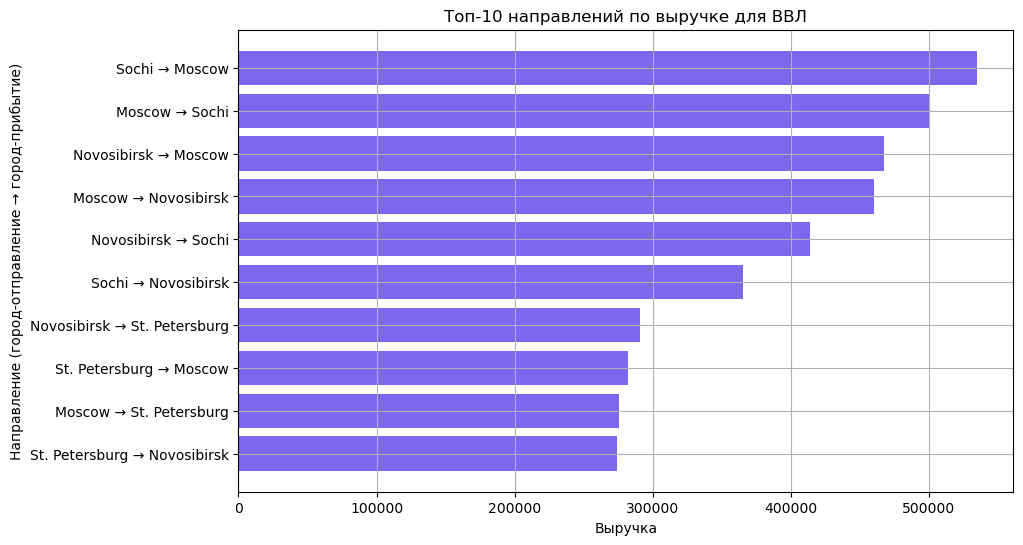

In [231]:
plt.figure(figsize=(10, 6))
plt.barh(revenue_vvl['direction'], revenue_vvl['revenue_amount'], color='#7B68EE')
plt.xlabel('Выручка')
plt.ylabel('Направление (город-отправление → город-прибытие)')
plt.title('Топ-10 направлений по выручке для ВВЛ')
plt.gca().invert_yaxis()  # Чтобы самые популярные направления были сверху
plt.grid(True)
plt.show()

In [232]:
revenue_mvl = df[df['route_flight_type'] == 'МВЛ'].groupby(['orig_city', 'dest_city'])['revenue_amount'].sum().nlargest(10)
print("\nВыручка по топ-10 направлениям МВЛ:")
print(revenue_mvl)


Выручка по топ-10 направлениям МВЛ:
orig_city    dest_city  
Khudzhand    Moscow         97160
Osh          Moscow         80920
Moscow       Osh            72100
             Khudzhand      58750
Osh          Novosibirsk    57970
Khudzhand    Novosibirsk    57740
Novosibirsk  Osh            51930
             Bishkek        49040
Bishkek      Novosibirsk    48300
Moscow       Antalya        46900
Name: revenue_amount, dtype: int64


In [233]:
revenue_mvl = revenue_mvl.reset_index()
revenue_mvl['direction'] = revenue_mvl['orig_city'] + ' → ' + revenue_mvl['dest_city']

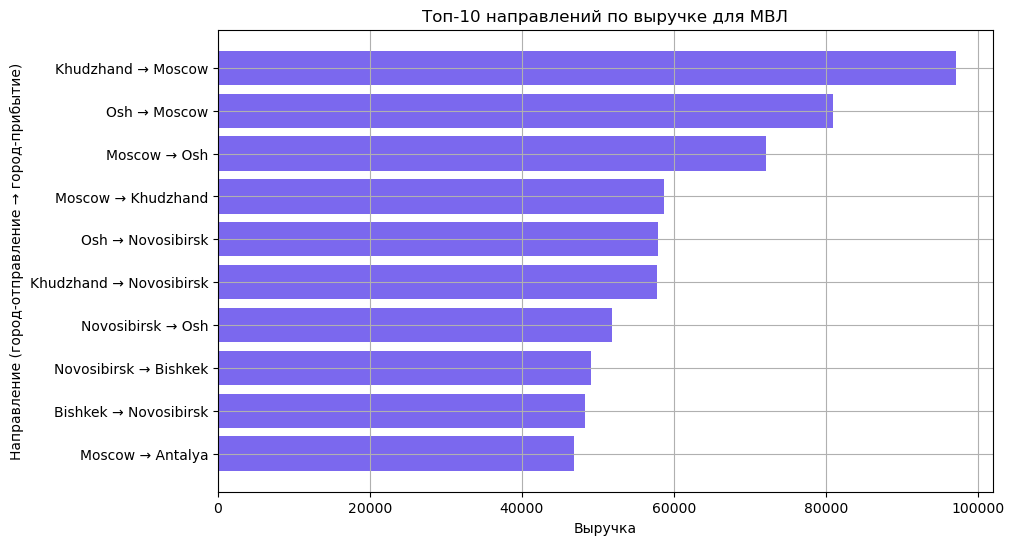

In [234]:
plt.figure(figsize=(10, 6))
plt.barh(revenue_mvl['direction'], revenue_mvl['revenue_amount'], color='#7B68EE')
plt.xlabel('Выручка')
plt.ylabel('Направление (город-отправление → город-прибытие)')
plt.title('Топ-10 направлений по выручке для МВЛ')
plt.gca().invert_yaxis()  # Чтобы самые популярные направления были сверху
plt.grid(True)
plt.show()

Вывод:

Найдены топ 10 напревлений с разбивкой по международным воздушным линиям и внутренним воздушным линияv: как по количеству купленных билетов, так и по выручке, полученной от этого. Результат можно лицезреть на соответствующих графиках. Для отстутствующих аббревиатур столбцов dest_city_code и orig_city_code датасета df в датасете codes вручную заполнены значения. Точнее было бы сказать, что сначала были найдены эти 14 значений (сначала в самом начале, а потом для дополнительной проверки и здесь), а из них создан словарь, который преобразован в dataframe и соединён с обрезанным до двух необходимых столбцов codes, уже называемом иначе, а именно code_city. Уже этот новый dataframe был связан с df, и созданы два новых столбца с названиями города отправления и города прибытия, по которым и выполнялись последующие действия.
- При работе с самими топ-10 уже непосредственно в срезах были созданы дополнительные столбцы с направлениями, которые использовались для создания диаграмм.

Теперь немного про сами резульатв:
- Самыми популярным ВВЛ стали пути Сочи-Москва и Москва-Сочи, они же стали путями ВВЛ с наибольшей выручкой;
- 3-е и 4-е место по популярности ВВЛ заняли пути СПб-Москва и Москва-СПб, по выручке таковыми стали Новосибирск-Москва и Москва-Новосибирск, что в целом ожидаем, ибо по популярности они следующие, а по цене значительно выше из-за расстояния.
- Топ-3 же по популярности и по выручке заняли пути между Москвой и Ошом и Худжандом - это логично связано с большим количеством мигрантов из Кыргызстана и Таджикистана, а в большей степени с большим количеством трудовых мигрантов, которые часто возвращаются орбратно в свою страну, а затем опять на заработки в Россию, для чего самым популярным местом является Москва, а далее и Новосибирск - это касается и выручки.
- Отдыхом же объяснимо 9 место по популярности и 10 место по выручке - путь Москва-Анталья. Это является классическим событием для отдыха, а с недавних времен и путь для переезда за границу.
- В целом позиция каждого пути и как такового его наличия в списке достаточно легко объяснимы.

#### 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

In [239]:
df.head(5)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,days_to_flight,order_group,orig_city,dest_city
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,False,ONLINE,12,Winter,35,Раннее бронирование,Moscow,Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,False,OFFLINE,12,Winter,3,Последние брони,Yuzhno-sakhalinsk,Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,True,ONLINE,11,Autumn,37,Раннее бронирование,Kaliningrad,Moscow
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,False,ONLINE,12,Winter,28,Среднесрочное бронирование,Voronezh,Moscow
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,True,OFFLINE,12,Winter,35,Раннее бронирование,Moscow,Krasnodar


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49365 entries, 0 to 49364
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         49365 non-null  datetime64[ns]
 1   flight_date_loc    49365 non-null  datetime64[ns]
 2   pax_type           49365 non-null  object        
 3   revenue_amount     49365 non-null  int64         
 4   orig_city_code     49365 non-null  object        
 5   dest_city_code     49365 non-null  object        
 6   route_flight_type  49365 non-null  object        
 7   ffp_flag           49365 non-null  bool          
 8   sale_type          49365 non-null  object        
 9   month              49365 non-null  int32         
 10  season             49365 non-null  object        
 11  days_to_flight     49365 non-null  int64         
 12  order_group        49365 non-null  object        
 13  orig_city          49365 non-null  object        
 14  dest_c

In [241]:
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32', 'datetime64'])
numeric_df

,issue_date,flight_date_loc,revenue_amount,month,days_to_flight
0,2021-12-07,2022-01-11,200,12,35
1,2021-12-31,2022-01-03,610,12,3
2,2021-11-28,2022-01-04,390,11,37
3,2021-12-08,2022-01-05,190,12,28
4,2021-12-08,2022-01-12,190,12,35
...,...,...,...,...,...
49360,2022-06-11,2022-06-22,480,6,11
49361,2022-06-06,2022-06-20,270,6,14
49362,2022-06-26,2022-06-29,230,6,3
49363,2022-06-26,2022-06-28,270,6,2


In [242]:
correlation_matrix = numeric_df.corr()
correlation_matrix

,issue_date,flight_date_loc,revenue_amount,month,days_to_flight
issue_date,1.000000,0.959028,0.241872,-0.184942,-0.076280
flight_date_loc,0.959028,1.000000,0.245822,-0.212695,0.209332
revenue_amount,0.241872,0.245822,1.000000,-0.054421,0.030329
month,-0.184942,-0.212695,-0.054421,1.000000,-0.110235
days_to_flight,-0.076280,0.209332,0.030329,-0.110235,1.000000


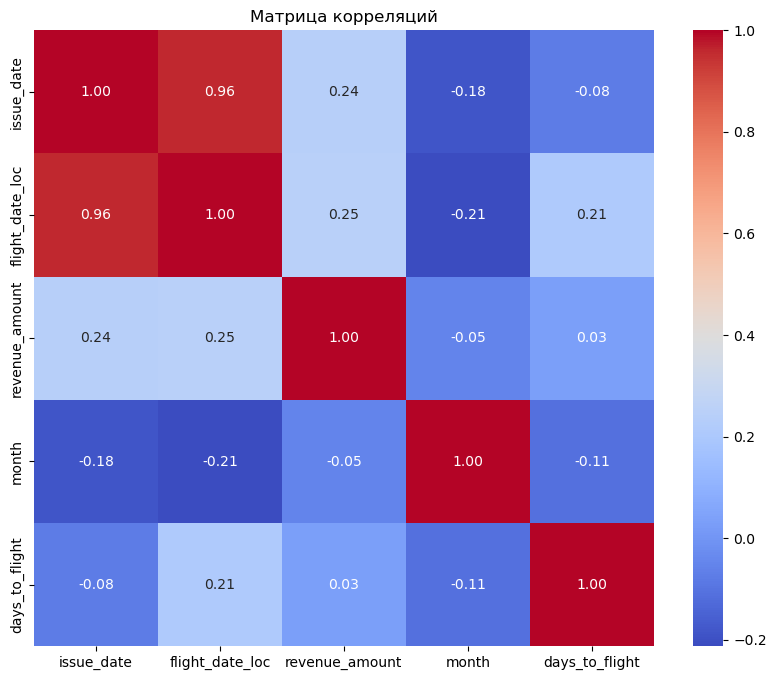

In [243]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

Вывод: в целом, связь почти везде незначительная, за исключением сильной положительной связи между датой покупки и датой совершения полёта - они имеют тенденцию изменяться в одном направлении, причем почти идеальную положительную корреляцию, то есть изменяются почти синхронно в одном направлении. Остальные имеют незначительную корреляцию, хотя некоторые значения почти дотягивают до слабой положительной и отрицательной корреляций. Например, слабую положительную корреляцию имеет выручка с датой покупки билета и с датой совершения перелёта - незначительно одно увеличивается с увеличением другого. С ними же слабую отрицательную корреляцию имеет месяц покупки билета - при увеличении одного другое уменьшается.